In [1]:
#!pip3 install pyforest
#!pip3 install lazypredict
#!pip3 install -U kaleido
#!pip3 install plotly
#!pip3 install cufflinks
#!pip3 install --upgrade pandas
#!pip3 install openyxl
import pandas as pd

In [2]:
from fast_ml.model_development import train_valid_test_split

In [3]:
# Get a Regressor first! 

# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.experimental import 

# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import DecisionTreeClassifier
#from sklearn.ensemble import 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_auc_score
#Import the class
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

import itertools

In [4]:
%matplotlib inline
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
import os

if not os.path.exists("images"):
    os.mkdir("images")
    
# Importing important libraries
import pyforest
#from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix# Scikit-learn packages
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error# Hide warnings

In [9]:
from datetime import date

today = date.today()
# Month abbreviation, day and year	
d4 = today.strftime("%b-%d-%Y")
print("Today is ",d4)
# dd/mm/YY
#d1 = today.strftime("%d/%m/%Y")
#print("d1 =", d1)

# Textual month, day and year	
#d2 = today.strftime("%B %d, %Y")
#print("d2 =", d2)

# mm/dd/y
#d3 = today.strftime("%m/%d/%y")
#print("d3 =", d3)

Today is  Sep-13-2023


## Import main file of data from original csv
put it in df dataframe

In [10]:
# Import dataset and take a look at the Analysis subcategory

df = pd.read_csv('../M-komp_210420.csv')#, index_col=0)
df.Analysis

0          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
1        M-KOMPG^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IG...
2          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
3          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
4          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
                               ...                        
67183    S-ALB^S-A1AT^S-OROSO^S-HAPTO^S-IGA^S-PROTE^S-I...
67184    MFIXS^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^...
67185               S-ALB^S-IGG^S-IGA^S-PROTE^S-IGM^MFIXS^
67186    MFIXS^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^...
67187    S-ALB^S-A1AT^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-PRO...
Name: Analysis, Length: 67188, dtype: object

In [11]:
def conv_to_float(in_sample):
    errors = 0
    count_less = 0
    stock_price = in_sample #"2,999.99"
    stock_price_float = ""
    for x in stock_price:        
        if x == ',':
            x = '.'
        if x == '*':
            continue
        if x == '<':
            count_less += 1
            continue
        else:
            stock_price_float += x
    
    try:
        #x = int(input("Please enter a number: "))
        stock_price_float = float(stock_price_float)
        #break
    except ValueError:
        errors += 1
        print("Oops!  That was not a valid number. It says: ", stock_price)
    
    return stock_price_float, errors, count_less

#res, err, c_l = conv_to_float(arr[3]+'dd')

#if err == 0:
#    print(arr[3])
#    print(res, err)#stock_price_float)
#    print(type(res))#stock_price_float))
#else:
#    print("we skip this since")
#    print(arr[3])
#    print(res, err)#stock_price_float)
#    print(type(res))#stock_price_float))
    

In [12]:
# define a function which searcher for specific word
# data_in is a list of markings from the samples
# word_in is the single marking we are looking for
# output is a new list of indices where the word was found in the data_in

def find_word(data_in, word_in):
    
    ind = []
    for row in range(len(data_in)):
        indices = [i for i, x in enumerate(data_in[row]) if x == word_in]
        if len(indices) > 0: # Found!
            ind.append(row)
    
    return ind


In [13]:
# Will remove double, triple markings and make sure all samples are correctly marked
def clarify_markings(in_df):
    
    return out_df 

In [14]:
# Will remove badly marked samples and return only samples which are correctly marked
def seperate_good_bad_rows(in_df):
    
    # Remove doubles, triples etc.
    
    return out_df

In [15]:
arr=[]
ind=[]
for sample in range(len(df)):#164,305):
    #print("for sample:",sample)
    markings = df.Analysis[sample].split("^")
    values   = df.PValue[sample].split("^")
    #for k in range(len(values)-1):
    indices = [i for i, x in enumerate(markings) if x == 'S-KA/LAF']
    if len(indices) > 0: # Found!
        arr.append(values[indices[0]])
        ind.append(sample)
        #print('{}={}'.format(markings[indices[0]], values[indices[0]]))
        #print(indices)
        #arr = ['{}={}'.format(markings[indices[0]], values[indices[0]]) for k in range(len(values)-1)]
        #arr = ['{}={}'.format(markings[k], values[k]) for k in range(len(values)-1)]

In [16]:
# loading pre-processed data
#full_df = pd.read_pickle('full_df_saved27Aug2023')
#full_df

In [17]:
new_arr = []
new_ind = []
skipped_samples = 0
count_less = 0
for k in range(len(arr)):
    res, err, c_l = conv_to_float(arr[k])
    if err == 0:
        if c_l > 0:
            count_less += 1
        new_arr.append(res)
        new_ind.append(k)#ind[k])
    else:
        #print("skipping sample:", res, "at location", k)
        skipped_samples += 1
print("We skipped ", skipped_samples, " samples due to strange markings next to the measurement such as: comm. ")
print("In total we have ", len(new_arr), "samples with S-KA/LAF markings.")
print("We found {} which are less than 0.1".format(count_less))
#new_arr = [conv_to_float(arr[k]) for k in range(len(arr))]

Oops!  That was not a valid number. It says:  Komm
Oops!  That was not a valid number. It says:  Komm
Oops!  That was not a valid number. It says:  Komm
Oops!  That was not a valid number. It says:  Komm
Oops!  That was not a valid number. It says:  Komm
Oops!  That was not a valid number. It says:  Komm
Oops!  That was not a valid number. It says:  Komm
We skipped  7  samples due to strange markings next to the measurement such as: comm. 
In total we have  2986 samples with S-KA/LAF markings.
We found 310 which are less than 0.1


In [18]:
min_normal = 0.31
max_normal = 1.6
normal = []
not_normal = []
for k in range(len(new_arr)):
    tempv = new_arr[k]
    #print("\n",k,tempv)
    if (tempv <= max_normal and tempv >= min_normal):
        #print("normal")
        #print("new_ind[{}]={}".format(k,new_ind[k]))
        normal.append(new_ind[k]) # append here the index of the normal value
    else:
        #print("not normal")
        not_normal.append(new_ind[k]) # append here the index of the non normal value
print('We found {} normal samples within range ({},{}). Remaining {} are not in normal range.'.format(len(normal), min_normal, max_normal,len(new_arr)-len(normal)))
print('So there are {} marked FL and not normal.'.format(len(not_normal)))

We found 1893 normal samples within range (0.31,1.6). Remaining 1093 are not in normal range.
So there are 1093 marked FL and not normal.


In [19]:
# to find the above we have saved their indexes in the list not_normal. To see them therefore we call
# new_arr[not_normal[k]]

# just checking
for k in not_normal[:10]:
    #print(k)
    print(new_arr[k])

103.0
1660.0
167.0
454.0
734.0
880.0
111.0
101.0
1280.0
113.0


In [20]:
for k in normal[:20]:
    print(arr[k], new_arr[k], ind[k])
for k in not_normal[:20]:
    print(arr[k], new_arr[k])

1,2 1.2 74
0,45 0.45 277
1,1 1.1 587
1,3 1.3 624
1,1 1.1 723
1,1 1.1 750
1,0 1.0 1020
1,2 1.2 1022
1,1 1.1 1321
1,5 1.5 1415
0,7 0.7 1746
1,0 1.0 1786
1,1 1.1 1827
0,6 0.6 1921
1,0 1.0 1928
1,0 1.0 1959
1,2 1.2 1981
0,9 0.9 1988
0,9 0.9 1989
0,81 0.81 2258
103* 103.0
1660* 1660.0
167* 167.0
454* 454.0
734* 734.0
880* 880.0
111* 111.0
101* 101.0
1280* 1280.0
113* 113.0
3,3* 3.3
4,4* 4.4
5,0* 5.0
13,4* 13.4
9,1* 9.1
2,6* 2.6
9,9* 9.9
9,6* 9.6
<0,1* 0.1
2,1* 2.1


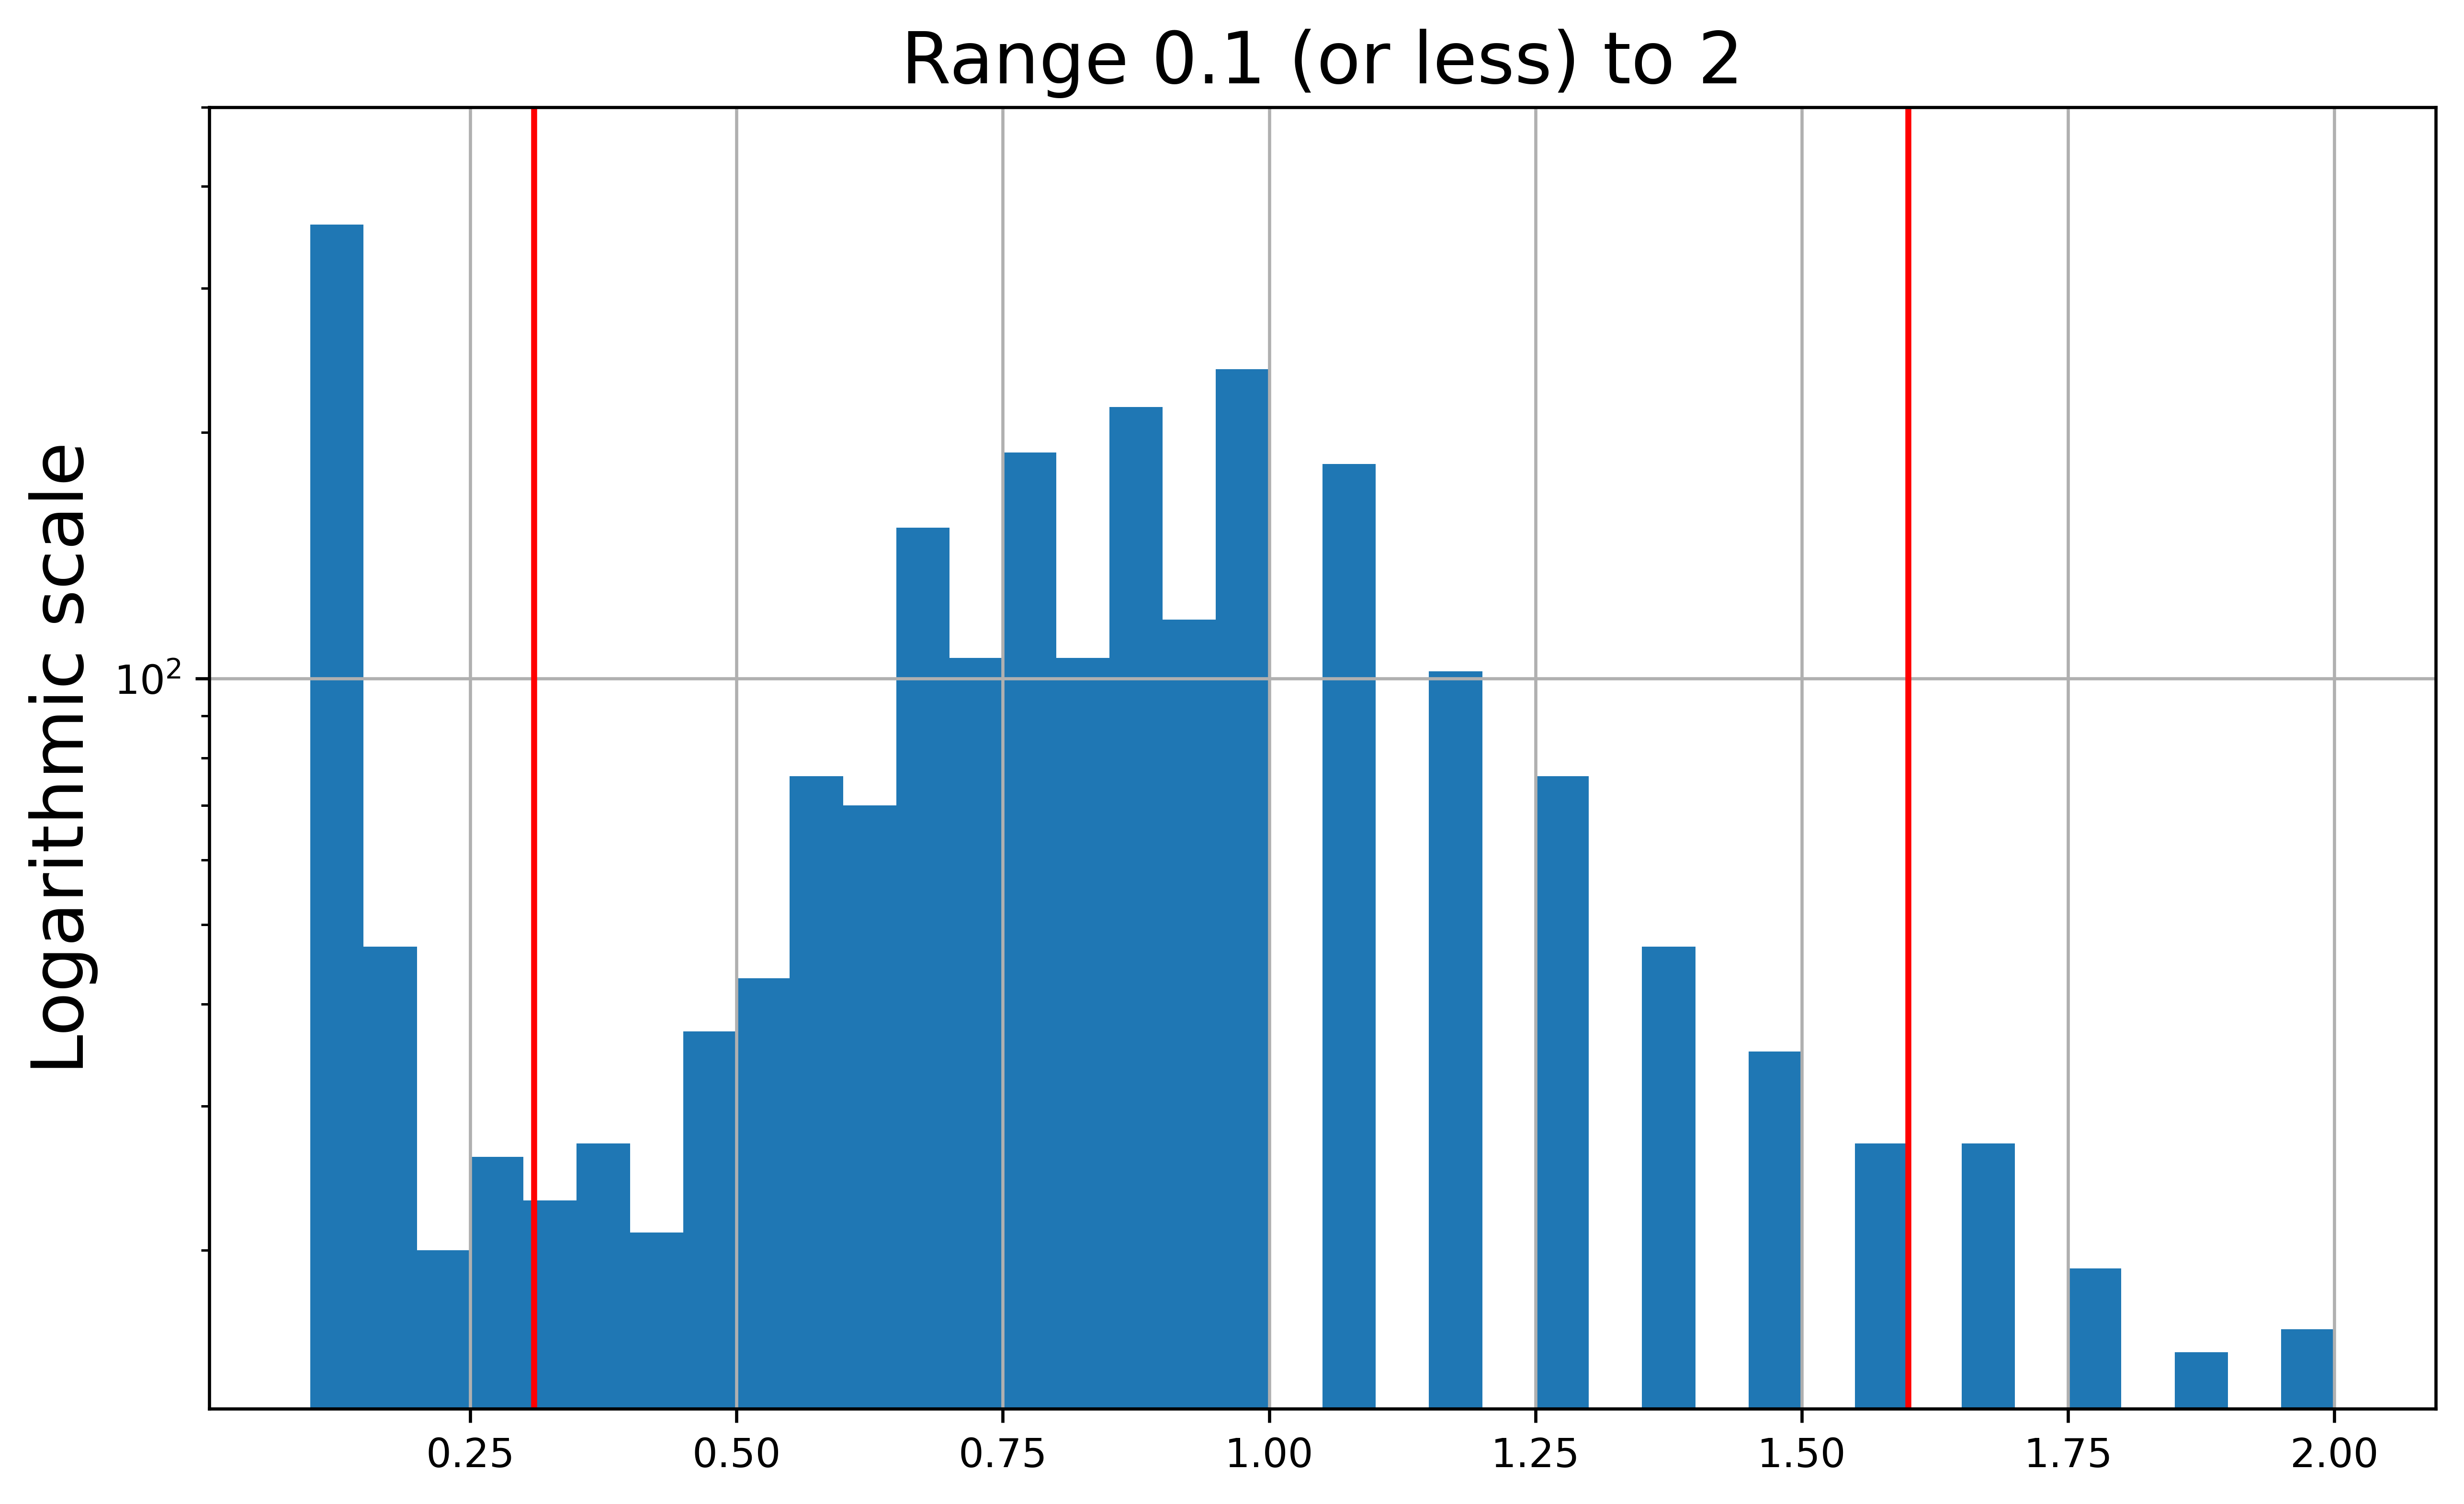

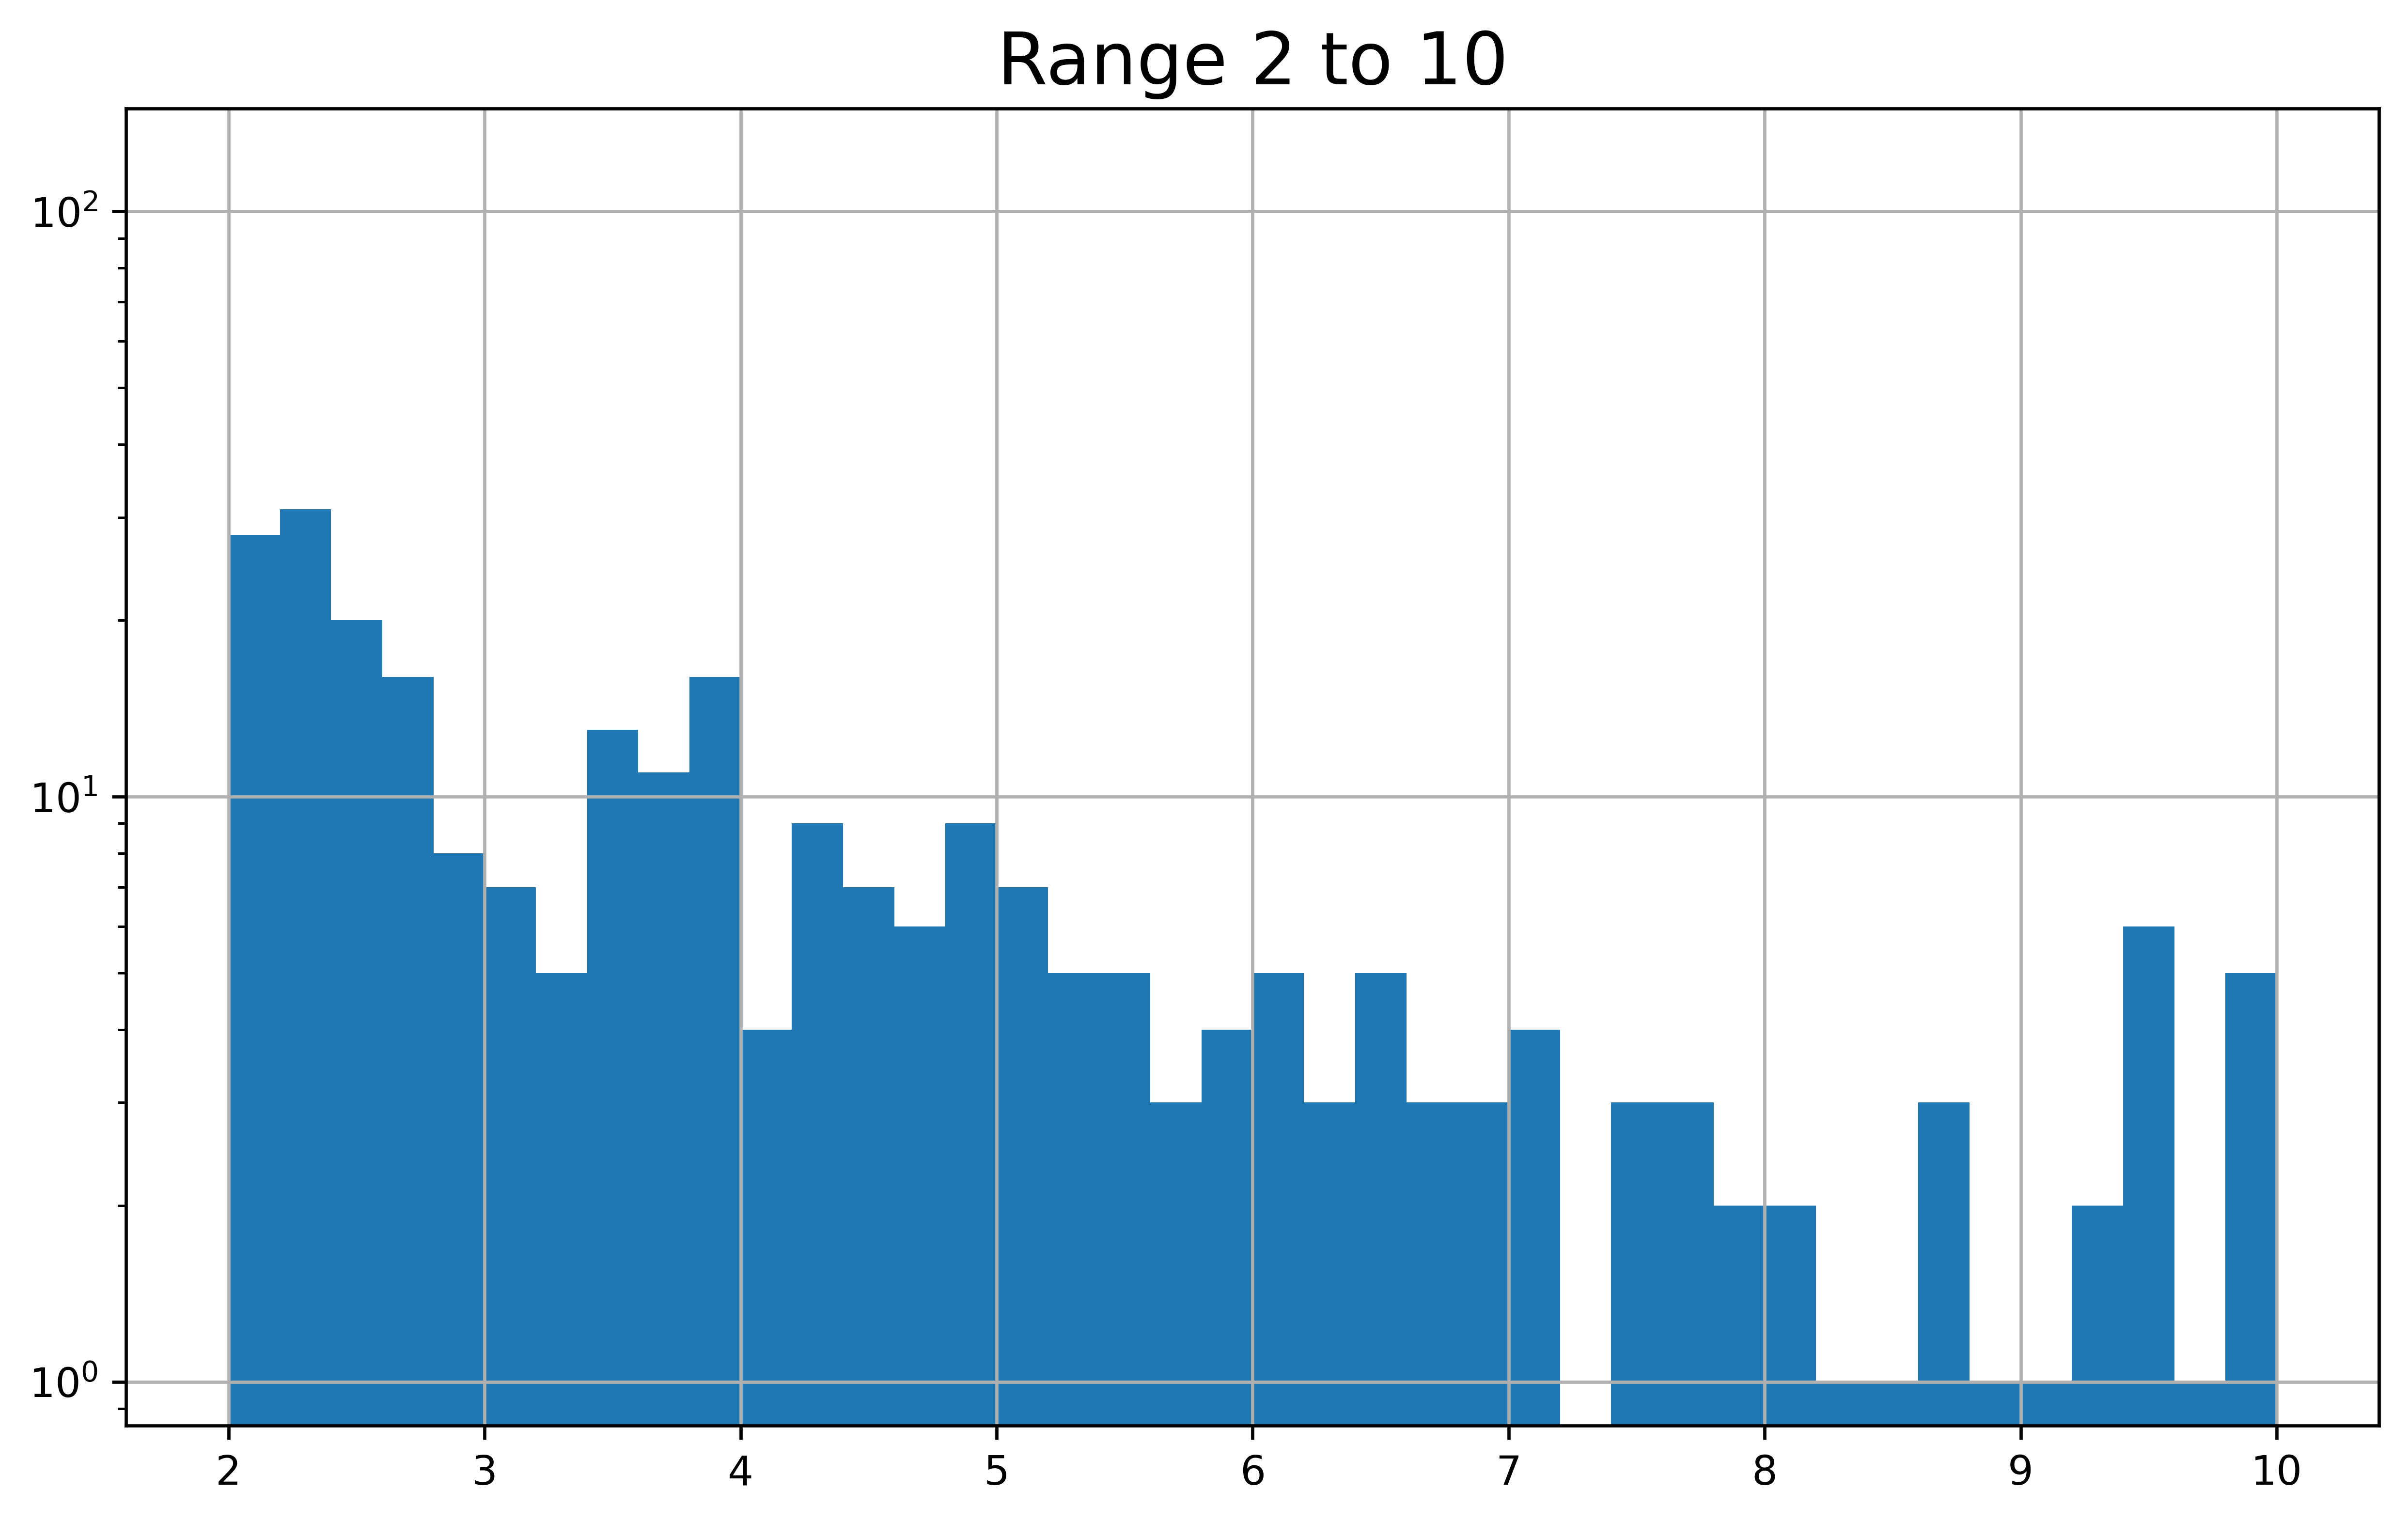

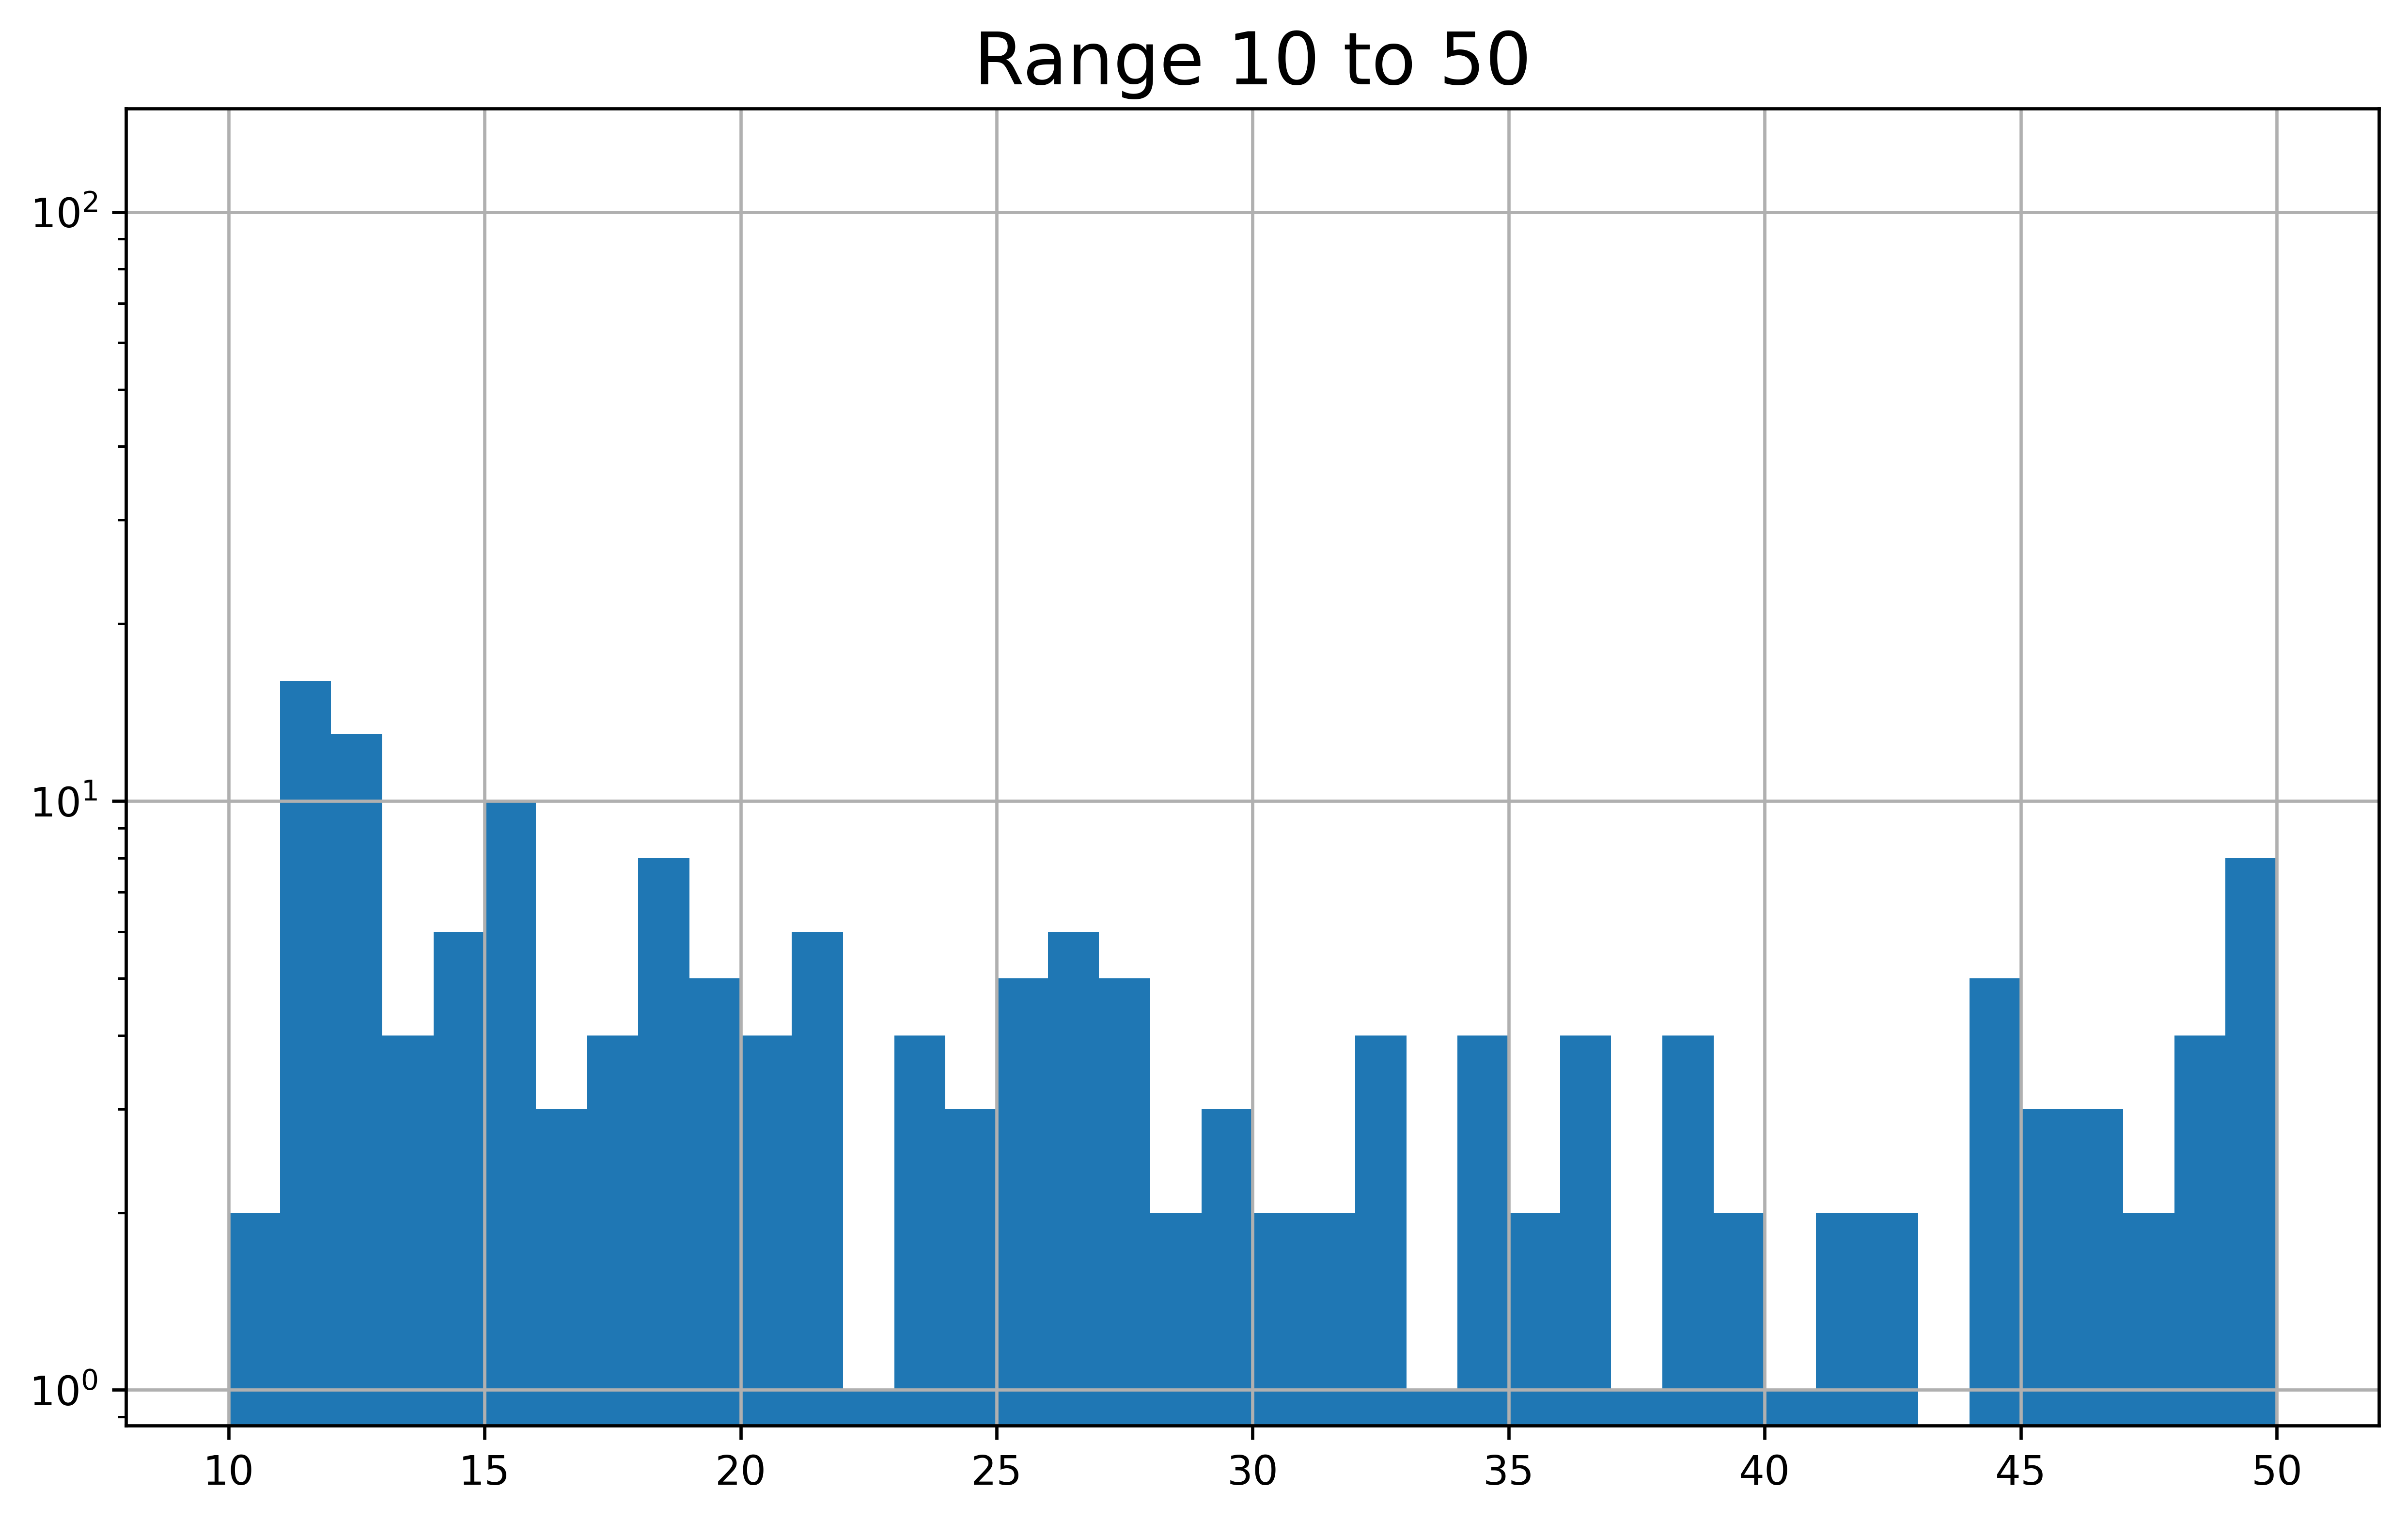

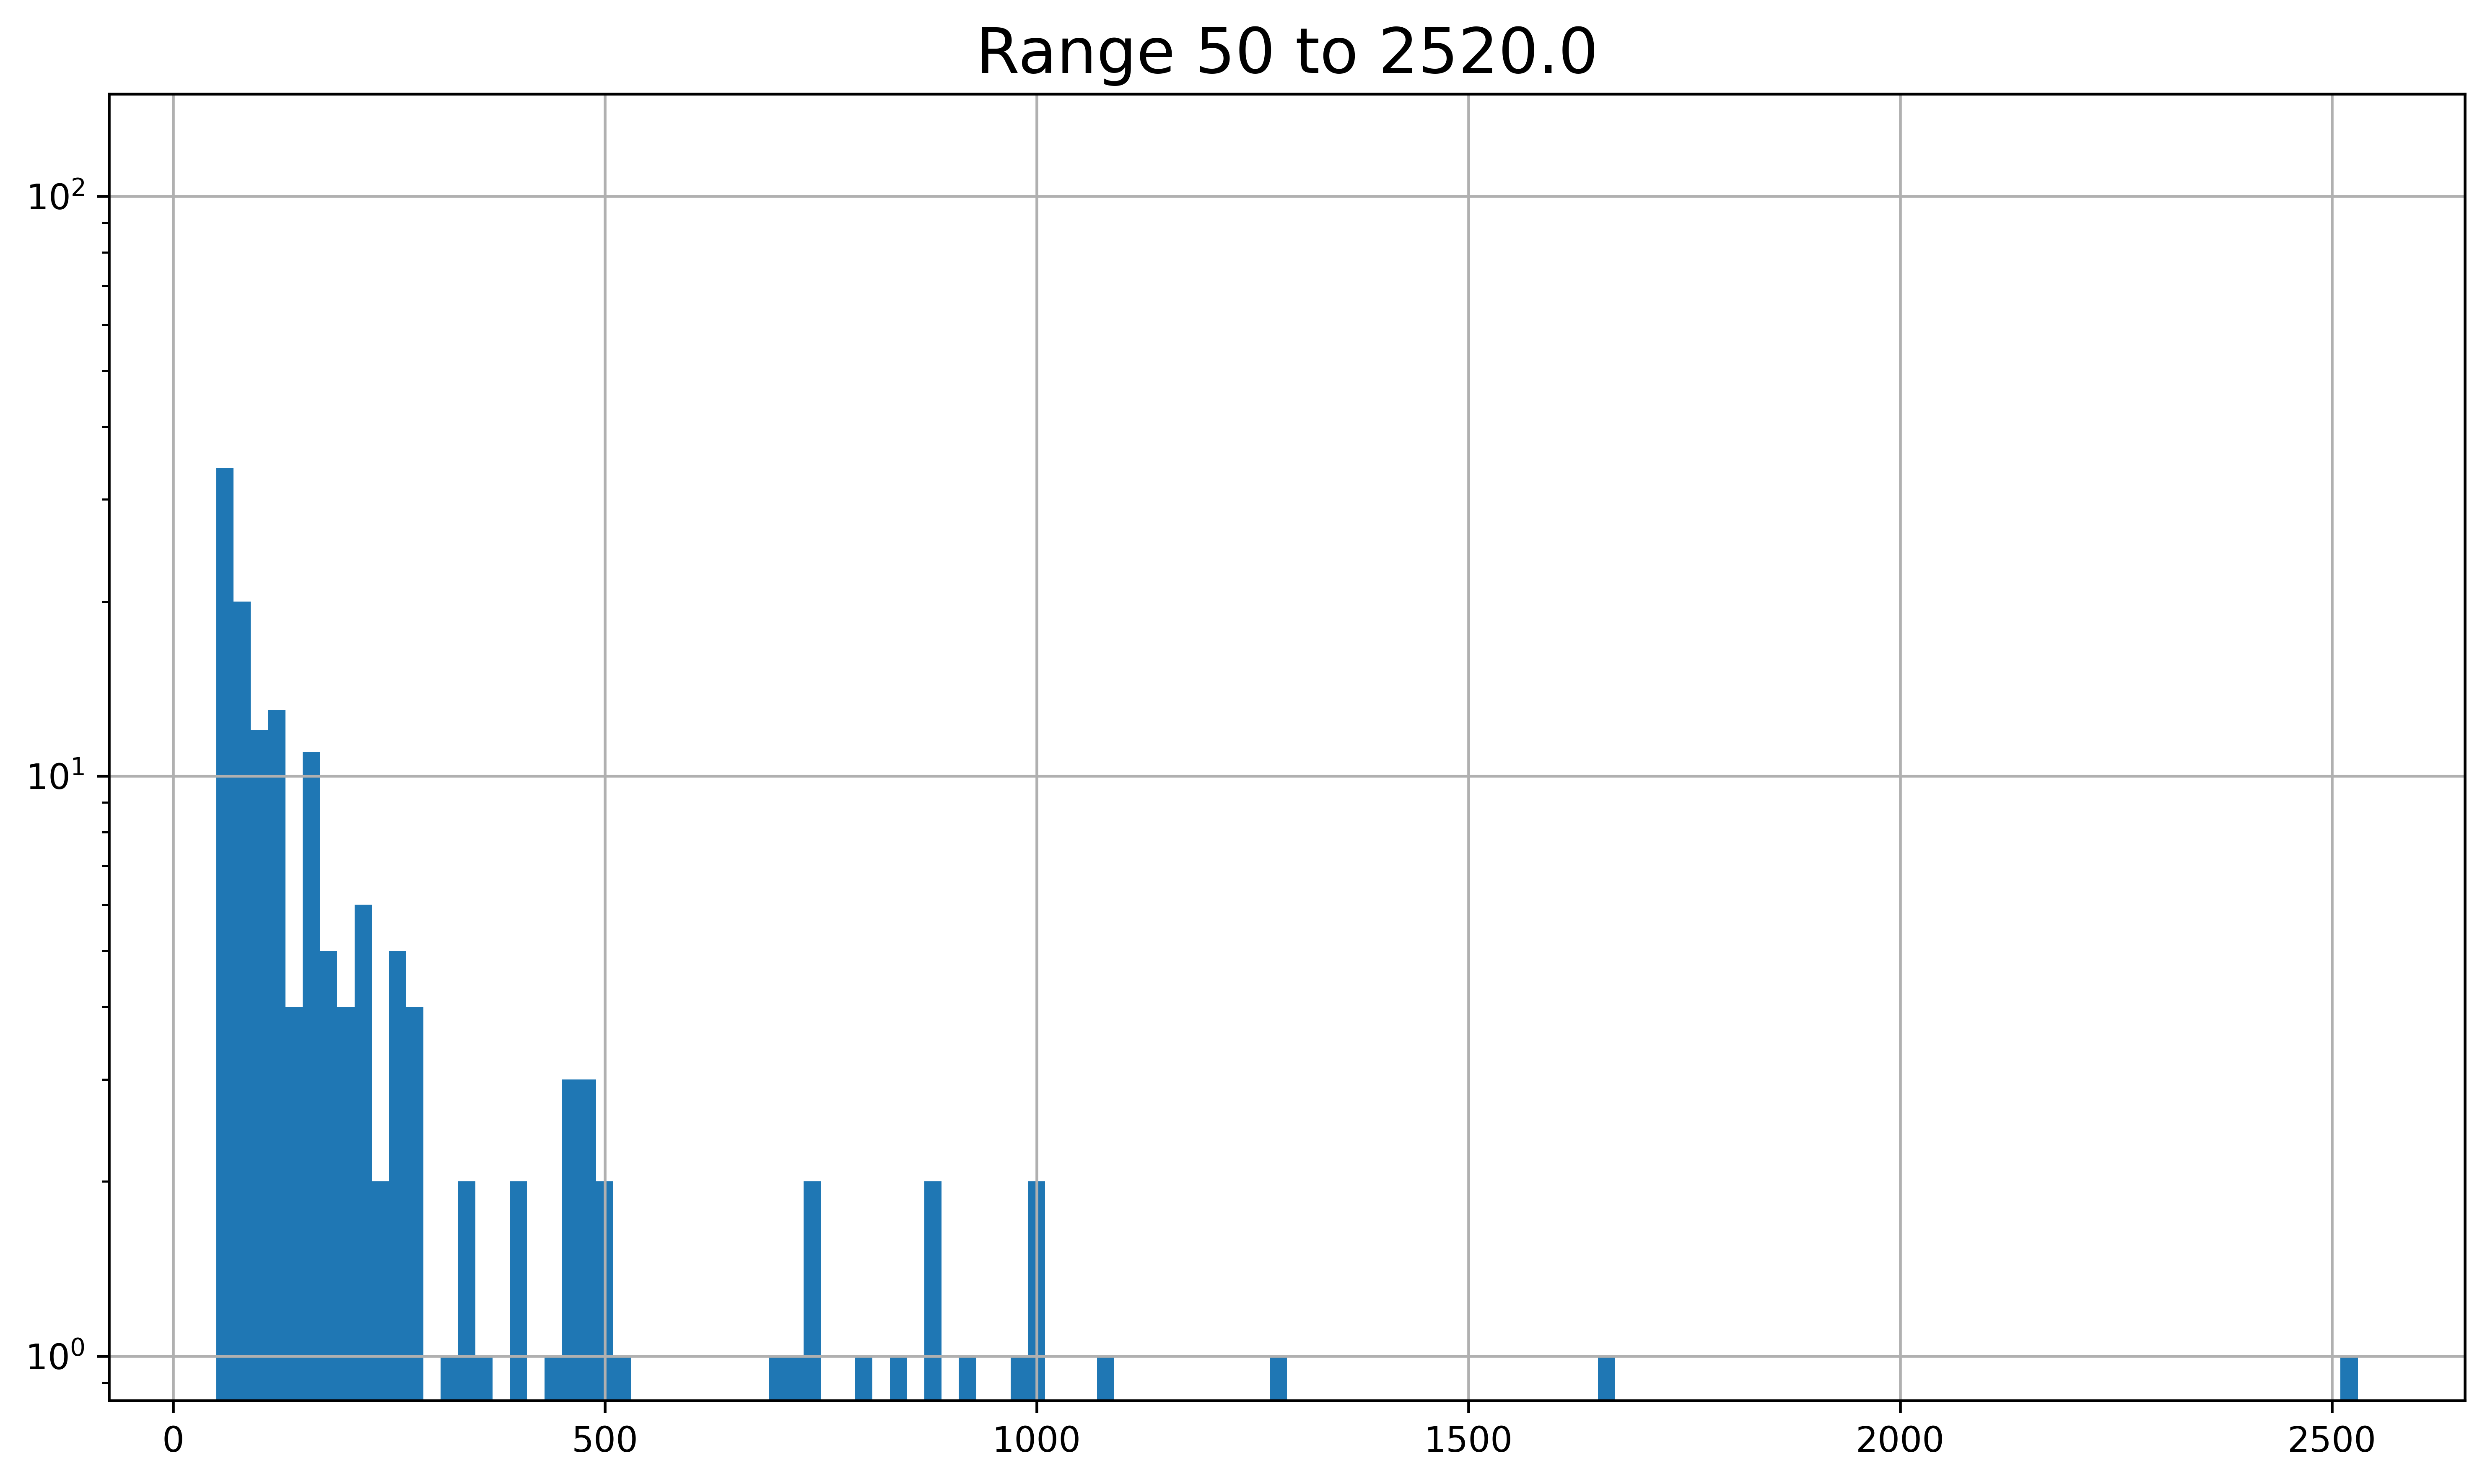

In [22]:

#bin_size = 0.1; min_edge = 0; max_edge = 2.5
#N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
#bin_list = numpy.linspace(min_edge, max_edge, Nplus1)


import numpy as np

import matplotlib.pyplot as plt
#f, axs = plt.subplots(1, 4, figsize=(25, 7))

#plt.subplot(1,4,1)
fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.gca()
binwidth = .05
plt.hist(new_arr, bins=np.arange(min(new_arr), 2 + binwidth, binwidth))
plt.yscale('log', nonpositive='clip')
plt.ylim([0, 500])
# only one line may be specified; full height
plt.axvline(x=max_normal, color='r', label='axvline - full height')
plt.axvline(x=min_normal, color='r', label='axvline - full height')
#ax2.axvline(x=1, color='r', linestyle='dashed', linewidth=5)
plt.grid()
# displaying the title
plt.title('Range {} (or less) to 2'.format(min(new_arr)), fontsize=18)
plt.ylabel('Logarithmic scale', fontsize=18)
fig.savefig('fl1Sept13.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"})

fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.gca()
#plt.subplot(1,4,2)
binwidth = .2
plt.hist(new_arr, bins=np.arange(2, 10 + binwidth, binwidth))
plt.yscale('log', nonpositive='clip')
plt.ylim([0, 150])
plt.grid()
plt.title("Range 2 to 10", fontsize=18)
fig.savefig('fl2Sept13.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"})

#plt.subplot(1,4,3)
fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.gca()
binwidth = 1
plt.hist(new_arr, bins=np.arange(10, 50 + binwidth, binwidth))
plt.yscale('log', nonpositive='clip')
plt.ylim([0, 150])
plt.grid()
plt.title("Range 10 to 50", fontsize=18)
fig.savefig('fl3Sept13.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"})

fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.gca()
#plt.subplot(1,4,4)
binwidth = 20
plt.hist(new_arr, bins=np.arange(50, max(new_arr) + binwidth, binwidth))
plt.yscale('log', nonpositive='clip')
plt.ylim([0, 150])
plt.title('Range 50 to {}'.format(max(new_arr)), fontsize=18)
plt.grid()
plt.tight_layout() 
plt.show() 
fig.savefig('fl4Sept13.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"})

#### check samples not belonging to "normal" range for possible removal 

In [234]:
# first we identify all samples not in normal range but close enough to it

# Finding samples in range 1.6 to 2.0
rangebelow = [(new_arr[k],new_ind[k]) for k in range(len(new_arr)) if new_arr[k] <= 0.1]
rangelow = [(new_arr[k],new_ind[k]) for k in range(len(new_arr)) if new_arr[k] > 0.1 and new_arr[k] < min_normal]
rangenormal = [(new_arr[k],new_ind[k]) for k in range(len(new_arr)) if new_arr[k] > min_normal and new_arr[k] < max_normal]
range1p6to2p0 = [(new_arr[k],new_ind[k]) for k in range(len(new_arr)) if new_arr[k] > max_normal and new_arr[k] < 2.0] 
rangeremaining =  [(new_arr[k],new_ind[k]) for k in range(len(new_arr)) if new_arr[k] > 2.0] 

In [168]:
for k in rangenormal:
    print("The names {} and values {}".format(df.Analysis[k[1]].split("^"),df.PValue[k[1]].split("^")))

The names ['S-KAPPAF', 'S-LAMBDF', 'S-KA/LAF', 'S-ALB', 'S-IGG', 'S-IGA', 'S-IGM', ''] and values ['18', '15', '1,2', '40', '9,3', '0,74*', '0,22*', '']
The names ['S-KAPPAF', 'S-LAMBDF', 'S-KA/LAF', 'MFIXS', 'S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] and values ['19', '43*', '0,45', 'Komm', '45', '0,88', '1,6', '10', '3,4', '0,98', '1,4', '']
The names ['S-PROTE', 'S-KAPPAF', 'S-LAMBDF', 'S-KA/LAF', 'S-ALB', 'S-IGG', 'S-IGA', 'S-IGM', 'MFIXS', ''] and values ['46*', '49*', '45*', '1,1', '22*', '7,3', '1,5', '2,2*', 'Komm', '']
The names ['S-PROTE', 'S-KAPPAF', 'S-LAMBDF', 'S-KA/LAF', 'M-KOMPG', 'S-IGGBER', 'MFIXS', 'S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGA', 'S-IGM', 'S-A1AT', ''] and values ['74', '28*', '22', '1,3', '6*', '8,0', 'Komm', '46*', '0,98', '1,8', '0,60*', '0,91', '1,6', '']
The names ['S-KAPPAF', 'S-LAMBDF', 'S-KA/LAF', 'S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] and values ['21', '19', '1,1', '50*', '0,65', '0,54', '1

In [152]:
# If the row is marked as one  then we do not need to delete it
len(new_arr)

2986

In [ ]:
# first create the list of marking
new_mark_arr = []
for k in rangelow:
    new_mark_arr.append(df.Analysis[k[1]].split("^"))

In [169]:
# first create the list of marking
new_mark_arr = []
for k in rangenormal:
    new_mark_arr.append(df.Analysis[k[1]].split("^"))


In [171]:

res_ind = find_word(new_mark_arr,'M-KOMPG')
res_ind
#for k in range(len(res_ind)):
#    print("We found {}".format(rangelow[k]))

[3,
 11,
 13,
 16,
 23,
 25,
 28,
 46,
 53,
 54,
 61,
 62,
 63,
 83,
 85,
 86,
 117,
 119,
 128,
 133,
 140,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 174,
 184,
 195,
 227,
 228,
 232,
 233,
 242,
 247,
 249,
 254,
 256,
 267,
 283,
 291,
 332,
 354,
 392,
 393,
 399,
 401,
 435,
 439,
 443,
 446,
 491,
 566,
 591,
 607,
 630,
 631,
 632,
 686,
 695,
 696,
 697,
 714,
 725,
 727,
 728,
 729,
 733,
 734,
 745,
 749,
 750,
 751,
 759,
 761,
 762,
 763,
 768,
 770,
 779,
 786,
 787,
 789,
 792,
 793,
 803,
 807,
 815,
 836,
 837,
 838,
 855,
 857,
 870,
 884,
 893,
 895,
 901,
 902,
 903,
 906,
 907,
 910,
 920,
 929,
 937,
 955,
 959,
 967,
 968,
 987,
 996,
 1002,
 1007,
 1019,
 1023,
 1030,
 1034,
 1042,
 1046,
 1052,
 1056,
 1074,
 1076,
 1077,
 1099,
 1100,
 1103,
 1104,
 1108,
 1125,
 1126,
 1143,
 1156,
 1158,
 1183,
 1186,
 1198,
 1200,
 1203,
 1204,
 1207,
 1214,
 1217,
 1227,
 1232,
 1242,
 1250,
 1251,
 1255,
 1271,
 1278,
 1281,
 1282,
 1284,
 1285,
 1287,


In [155]:
print("The names {} and values {}".format(df.Analysis[125].split("^"),df.PValue[125].split("^")))
print("The names {} and values {}".format(df.Analysis[123].split("^"),df.PValue[125].split("^")))
print("The names {} and values {}".format(df.Analysis[124].split("^"),df.PValue[125].split("^")))

The names ['S-PROTE', 'M-KOMPG', 'S-IGGBER', 'S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGA', 'S-IGM', 'S-A1AT', ''] and values ['95*', '47*', '3,0*', '29*', '0,79', '0,99', '0,08*', '0,28', '1,2', '']
The names ['S-PROTE', 'S-IGGBER', 'M-KOMPG', 'S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGA', 'S-IGM', 'S-A1AT', ''] and values ['95*', '47*', '3,0*', '29*', '0,79', '0,99', '0,08*', '0,28', '1,2', '']
The names ['S-PROTE', 'S-IGGBER', 'M-KOMPG', 'S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGA', 'S-IGM', 'S-A1AT', ''] and values ['95*', '47*', '3,0*', '29*', '0,79', '0,99', '0,08*', '0,28', '1,2', '']


In [216]:
# Checking datatimes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67188 entries, 0 to 67187
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             67188 non-null  int64 
 1   LID            67188 non-null  int64 
 2   TimeStamp      67188 non-null  object
 3   SignTime       67188 non-null  object
 4   Value          67188 non-null  object
 5   ValueTime      67188 non-null  object
 6   DelimitValue   67188 non-null  object
 7   DelimitValue2  67188 non-null  object
 8   Analysis       67188 non-null  object
 9   PValue         67188 non-null  object
 10  Unit           67188 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.6+ MB


In [217]:
# Take a look at the dataframe from the Analysis category
Resdf = df.Analysis.str.split("^",expand=True,)
Resdf.iloc[1,:]
Resdf.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,M-KOMPG,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [14]:
len(Resdf.iloc[:,6].unique())

26

In [15]:
Resdf.iloc[:,3].unique()

array(['S-IGG', 'S-HAPTO', 'S-ALB', 'S-OROSO', 'S-IGM', 'S-IGA', 'MFIXS',
       'S-KA/LAF', 'M-KOMPG', 'M-KOMPA', 'S-IGD', 'M-KOMPM', 'S-IGGBER',
       'S-KAPPAF', 'S-IGMBER', 'S-LAMBDF', 'S-PROTE', 'S-A2MAKR',
       'S-PREALB', 'S-C4', 'S-CERULO', 'S-IGDBER', 'M-KOMPD', 'M-KOMP',
       'M-KOMPFL', 'S-IGABER', '', 'S-C3', 'S-A1AT'], dtype=object)

In [218]:
set_of_cond = set(Resdf.iloc[:,3].unique())#{'apple', 'orange', 'apple', 'pear', 'orange', 'banana'}
set_of_cond = set_of_cond or set(Resdf.iloc[:,4].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,2].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,1].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,5].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,6].unique())
et_of_cond = set_of_cond or set(Resdf.iloc[:,14].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,12].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,11].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,15].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,16].unique())
et_of_cond = set_of_cond or set(Resdf.iloc[:,114].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,112].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,111].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,115].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,116].unique())
set_of_cond = set_of_cond-{'',None}
set_of_cond

{'M-KOMP',
 'M-KOMPA',
 'M-KOMPD',
 'M-KOMPFL',
 'M-KOMPG',
 'M-KOMPM',
 'MFIXS',
 'S-A1AT',
 'S-A2MAKR',
 'S-ALB',
 'S-C3',
 'S-C4',
 'S-CERULO',
 'S-HAPTO',
 'S-IGA',
 'S-IGABER',
 'S-IGD',
 'S-IGDBER',
 'S-IGG',
 'S-IGGBER',
 'S-IGM',
 'S-IGMBER',
 'S-KA/LAF',
 'S-KAPPAF',
 'S-LAMBDF',
 'S-OROSO',
 'S-PREALB',
 'S-PROTE'}

In [219]:
dict_of_cond = {item:val+1 for val,item in enumerate(set_of_cond)}
dict_of_cond#['S-C4']

{'S-PROTE': 1,
 'S-IGABER': 2,
 'M-KOMPA': 3,
 'S-IGM': 4,
 'S-IGG': 5,
 'M-KOMPD': 6,
 'S-C3': 7,
 'S-HAPTO': 8,
 'S-LAMBDF': 9,
 'S-PREALB': 10,
 'M-KOMPFL': 11,
 'M-KOMP': 12,
 'S-C4': 13,
 'S-KAPPAF': 14,
 'S-IGD': 15,
 'MFIXS': 16,
 'S-IGMBER': 17,
 'S-ALB': 18,
 'S-IGGBER': 19,
 'S-KA/LAF': 20,
 'S-IGA': 21,
 'M-KOMPM': 22,
 'S-OROSO': 23,
 'M-KOMPG': 24,
 'S-IGDBER': 25,
 'S-A2MAKR': 26,
 'S-CERULO': 27,
 'S-A1AT': 28}

### Note that sometimes they denote M-KOMPG or M-KOMP in the data!

In [220]:
input_histdf = df.Value.str.split("^",expand=True,)
#df.Value[1] # The original data
#histdf.iloc[1,:] # The new dataframe of the same data

input_histdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,0,3,5,9,6,9,15,18,22,24,28,32,36,43,45,46,45,38,36,27,26,24,22,24,17,19,17,17,19,15,18,20,20,22,20,24,27,28,33,32,35,39,44,51,50,58,63,70,81,87,...,138,142,144,146,143,149,145,136,130,123,119,117,117,109,96,80,62,50,37,25,20,15,14,10,8,8,6,4,1,0,1,2,4,2,3,5,7,10,13,17,23,25,34,43,57,72,69,54,45,
1,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14,
2,1,0,0,2,1,3,2,3,4,6,8,9,10,13,14,19,21,26,27,25,21,19,18,18,17,19,18,21,20,19,23,23,25,24,27,28,31,35,37,41,44,46,51,57,63,71,79,86,98,112,...,414,436,459,484,507,530,554,575,593,601,603,597,581,567,547,523,498,469,438,407,378,339,289,243,201,166,133,107,80,53,34,23,16,9,6,3,2,1,0,1,2,2,2,2,3,6,9,13,17,
3,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14,
4,0,2,4,3,6,7,9,13,15,18,21,26,30,32,37,41,43,38,32,29,23,23,19,18,18,17,17,16,16,16,17,19,19,19,22,22,27,28,30,34,34,39,40,47,51,56,61,65,74,83,...,136,140,144,149,153,155,159,158,155,152,150,145,139,134,127,117,109,101,90,75,61,50,41,31,22,15,9,4,2,0,1,0,0,1,1,2,2,3,4,4,4,6,8,14,16,18,22,29,36,


In [221]:
# Last column was left empty in data so we remove it here

input_histdf = input_histdf.drop(columns=[300])
input_histdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,3,5,9,6,9,15,18,22,24,28,32,36,43,45,46,45,38,36,27,26,24,22,24,17,19,17,17,19,15,18,20,20,22,20,24,27,28,33,32,35,39,44,51,50,58,63,70,81,87,...,132,138,142,144,146,143,149,145,136,130,123,119,117,117,109,96,80,62,50,37,25,20,15,14,10,8,8,6,4,1,0,1,2,4,2,3,5,7,10,13,17,23,25,34,43,57,72,69,54,45
1,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,238,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14
2,1,0,0,2,1,3,2,3,4,6,8,9,10,13,14,19,21,26,27,25,21,19,18,18,17,19,18,21,20,19,23,23,25,24,27,28,31,35,37,41,44,46,51,57,63,71,79,86,98,112,...,394,414,436,459,484,507,530,554,575,593,601,603,597,581,567,547,523,498,469,438,407,378,339,289,243,201,166,133,107,80,53,34,23,16,9,6,3,2,1,0,1,2,2,2,2,3,6,9,13,17
3,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,238,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14
4,0,2,4,3,6,7,9,13,15,18,21,26,30,32,37,41,43,38,32,29,23,23,19,18,18,17,17,16,16,16,17,19,19,19,22,22,27,28,30,34,34,39,40,47,51,56,61,65,74,83,...,135,136,140,144,149,153,155,159,158,155,152,150,145,139,134,127,117,109,101,90,75,61,50,41,31,22,15,9,4,2,0,1,0,0,1,1,2,2,3,4,4,4,6,8,14,16,18,22,29,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,0,0,0,1,2,2,3,4,5,6,8,9,11,13,15,16,19,19,20,21,21,21,21,20,20,20,20,21,23,25,27,29,33,36,40,43,45,46,45,44,43,42,43,46,49,54,58,62,67,70,...,287,295,302,307,314,322,332,337,333,326,323,317,304,285,265,243,229,217,204,190,175,164,159,160,169,191,226,270,322,374,417,436,413,330,197,80,21,3,0,0,0,0,1,2,3,3,4,5,7,7
67184,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,3,3,4,4,4,6,7,7,7,8,9,10,11,13,14,16,19,22,25,27,28,27,24,21,15,13,10,9,9,9,9,9,10,...,169,164,160,154,148,141,133,125,115,106,98,90,81,73,65,56,46,37,30,24,19,15,11,8,6,4,3,2,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,3
67185,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,5,5,6,6,7,8,9,10,12,13,16,21,24,26,28,27,24,20,16,12,10,8,8,8,8,9,10,11,...,385,386,388,387,381,371,358,342,322,301,279,260,240,219,196,174,150,127,106,86,71,56,45,36,28,21,16,13,10,7,4,3,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,2
67186,6,6,6,6,6,6,6,6,5,5,6,6,6,6,6,7,7,7,8,9,9,9,10,10,11,11,11,12,14,14,15,17,19,22,25,27,29,29,28,25,21,18,16,15,15,16,17,18,19,20,...,385,396,386,366,350,343,330,301,273,254,239,228,221,216,210,198,183,162,131,104,83,67,51,37,27,20,16,12,9,6,3,2,1,1,1,1,2,2,2,3,4,1,0,0,0,0,0,0,1,1


In [20]:
for s in ['M-KOMP']:#, 'M-KOMPG']:#,'S-IGG']:
    temp_df = df.Analysis.map(lambda x: 1 if s in x else 0)
temp_df.head(40)

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    0
25    0
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    0
Name: Analysis, dtype: int64

### Creating the classification set 

In [222]:
# The function which creates the column of 0s and 1s denoting which of the 67188 rows of data
# contain the "M-KOMP" or "M-KOMPG" or not
histdf = pd.DataFrame()
cnt = 1
for s in ['M-KOMP','M-KOMPFL','M-KOMPG','M-KOMPD','M-KOMPA','M-KOMPM','S-KAPPAF','S-LAMBDF']:#list(set_of_cond):
    print('s=',s)
    dftest = df.Analysis.map(lambda x: 1 if s in x else 0) #dict_of_cond[s]
    histdf.insert(loc=0, column=s, value = dftest)#'Res_'+str(cnt), value=dftest)
    cnt=cnt+1
histdf.head(40)
#dftest.head(20)

s= M-KOMP
s= M-KOMPFL
s= M-KOMPG
s= M-KOMPD
s= M-KOMPA
s= M-KOMPM
s= S-KAPPAF
s= S-LAMBDF


,S-LAMBDF,S-KAPPAF,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0


In [223]:
print('There are a total of {} rows in the set.'.format(len(histdf)))

There are a total of 67188 rows in the set.


In [23]:
# Finding and removing the controlset and any classifications with 4 markings
controlset = histdf[histdf.sum(axis=1)>=6]
controlset
print('There exist a total of {} samples which are marked by 6 or more markings. Those are removed below.'.format(len(controlset)))

There exist a total of 7 samples which are marked by 6 or more markings. Those are removed below.


## Removing a few samples (i.e. controlset) 

In [53]:
histdf = histdf[histdf.sum(axis=1)<6] # removing from classification (label)
print('The remaining set with less than 6 markings has {} rows.'.format(len(histdf)))

The remaining set with less than 6 markings has 67181 rows.


In [54]:
[print('Classes in column ',histdf.columns[i],': ',sum(histdf.iloc[:,i])) for i in range(8)] 
#sum(histdf['M-KOMP'])

Classes in column  S-LAMBDF :  2994
Classes in column  S-KAPPAF :  2994
Classes in column  M-KOMPM :  2011
Classes in column  M-KOMPA :  1522
Classes in column  M-KOMPD :  11
Classes in column  M-KOMPG :  9227
Classes in column  M-KOMPFL :  9
Classes in column  M-KOMP :  14629


[None, None, None, None, None, None, None, None]

## Correcting the remaining samples 

In [77]:
sum_temp = [sum(histdf.iloc[i,0:9]) for i in range(len(histdf))] 

In [99]:
new_temp = sum_temp.copy()

In [101]:
sum = 0
for k in [8, 7, 6, 5, 4, 3, 2, 1, 0]: #range(8):
    indices = [i for i, x in enumerate(new_temp) if x == k]
    print('We found {} samples with {} components marked.'.format(len(indices),k))
    sum+= len(indices)
    for j in sorted(indices, reverse=True):
        del new_temp[j]
print("Total elements were:", sum)

We found 0 samples with 8 components marked.
We found 0 samples with 7 components marked.
We found 7 samples with 6 components marked.
We found 6 samples with 5 components marked.
We found 974 samples with 4 components marked.
We found 101 samples with 3 components marked.
We found 13603 samples with 2 components marked.
We found 1962 samples with 1 components marked.
We found 50535 samples with 0 components marked.
Total elements were: 67188


In [87]:
ind = [1, 2, 3, 4]
for j in sorted([1,3], reverse=True):
    del ind[j]
ind

[1, 3]

In [76]:
indices0 = [i for i, x in enumerate(temp) if x == 0]
len(indices0)

1826

In [74]:
indices1 = [i for i, x in enumerate(temp) if x == 1]
len(indices1)

396

In [25]:
for word in ['M-KOMP',{'M-KOMPD','M-KOMPG'}]:
    for k in range(2,8):
        templist = histdf.loc[histdf.sum(axis=1)==2, word]
        print('There exist {} which have {} markings.'.format(len(templist),k))
        #histdf.loc[histdf.sum(axis=1)==k, word] = 0
        #print('There exist {} which have {} markings.'.format(len(templist),k))
#print('There remain {} rows in dataframe.'.format(len(histdf)))

KeyError: '1'

Found below that some kappa lambda marked rows are marked with kompG and not marked kompfl while others are marked with both G and FL and others marked with only FL. 

In [78]:
# There exist 3 which is both D and FL
kompDFL=histdf[histdf[['S-KAPPAF','S-LAMBDF']].sum(axis=1)==2]
#kompDFL=histdf[histdf[['S-KAPPAF','S-LAMBDF','M-KOMPG']].sum(axis=1)==3]
kompDFL

,S-LAMBDF,S-KAPPAF,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
74,1,1,0,0,0,0,0,0
117,1,1,0,0,0,1,0,1
137,1,1,0,0,0,1,0,1
220,1,1,0,0,0,1,0,1
240,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
67143,1,1,0,0,0,0,0,0
67144,1,1,0,0,0,0,0,0
67151,1,1,0,0,0,0,0,0
67159,1,1,0,0,0,0,0,0


In [55]:
histdf

,S-LAMBDF,S-KAPPAF,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
67183,1,1,0,0,0,1,0,1
67184,0,0,0,0,0,0,0,0
67185,0,0,0,0,0,0,0,0
67186,0,0,0,0,0,0,0,0


In [24]:
# There exist 3 which is both D and FL
kompDFL=histdf[histdf[{'M-KOMP','S-LAMBDF'}].sum(axis=1)>=2]
kompDFL

TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [93]:
markings = ['M-KOMP','M-KOMPFL','M-KOMPG','M-KOMPD','M-KOMPA','M-KOMPM','S-IGGBER','S-IGABER','S-IGDBER','S-IGMBER']
# The function which creates the column of 0s and 1s denoting which of the 67188 rows of data
# contain the "M-KOMP" or "M-KOMPG" or not
histdf = pd.DataFrame()
cnt = 1
for s in markings:#list(set_of_cond):
    print('s=',s)
    dftest = df.Analysis.map(lambda x: 1 if s in x else 0) #dict_of_cond[s]
    histdf.insert(loc=0, column=s, value = dftest)#'Res_'+str(cnt), value=dftest)
    cnt=cnt+1
print('Initially: there are a total of {} samples.'.format(len(histdf)))
histdf.head(20)
#dftest.head(20)

s= M-KOMP
s= M-KOMPFL
s= M-KOMPG
s= M-KOMPD
s= M-KOMPA
s= M-KOMPM
s= S-IGGBER
s= S-IGABER
s= S-IGDBER
s= S-IGMBER
Initially: there are a total of 67188 samples.


,S-IGMBER,S-IGDBER,S-IGABER,S-IGGBER,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


# Remove all double (or above) markings from data

In [90]:
# This function will remove all double or triple etc markings 
# kompG and kompA etc

# input is the main dataframe of all markings
# input two specific markings: i.e. 'M-KOMPD', 'M-KOMPA'
# output the new dataframe without the rows having above markings

def remove_markings(input_df, mark1, mark2):
    
    # Find all these rows with both of the markings
    kompGG = input_df[{mark1, mark2}]
    temp   = kompGG.sum(axis=1)<2
    cleaned_df = input_df.loc[temp]
    
    return cleaned_df

In [94]:
markings = ['M-KOMPG', 'M-KOMPA', 'M-KOMPD', 'M-KOMPM']
for word1 in markings:
    for word2 in markings:
        if word1 == word2:
            print('                           Skipping the words', word1, word2)
            continue
        print("Currently cleaning words: ", word1, word2)
        print("Previous size of dataframe: ", len(histdf))
        histdf = remove_markings(histdf, word1, word2)
        print("After cleaning size of dataframe: ", len(histdf))
    
#new_df = remove_markings(histdf, 'M-KOMPG', 'M-KOMPA')
#print(len(histdf), len(new_df))

                           Skipping the words M-KOMPG M-KOMPG
Currently clearning words:  M-KOMPG M-KOMPA
Previous size of dataframe:  67188
After clearning size of dataframe:  67146
Currently clearning words:  M-KOMPG M-KOMPD
Previous size of dataframe:  67146
After clearning size of dataframe:  67145
Currently clearning words:  M-KOMPG M-KOMPM
Previous size of dataframe:  67145
After clearning size of dataframe:  67085
Currently clearning words:  M-KOMPA M-KOMPG
Previous size of dataframe:  67085
After clearning size of dataframe:  67085
                           Skipping the words M-KOMPA M-KOMPA
Currently clearning words:  M-KOMPA M-KOMPD
Previous size of dataframe:  67085
After clearning size of dataframe:  67085
Currently clearning words:  M-KOMPA M-KOMPM
Previous size of dataframe:  67085
After clearning size of dataframe:  67079
Currently clearning words:  M-KOMPD M-KOMPG
Previous size of dataframe:  67079
After clearning size of dataframe:  67079
Currently clearning words:  M

In [107]:
markings1 = ['M-KOMP', 'M-KOMPG', 'M-KOMPA', 'M-KOMPD', 'M-KOMPM']
histdf[markings1][histdf[markings1].sum(axis=1)==2]
histdf[markings][histdf[markings].sum(axis=1)==1] # marked as having a single M-KOMP
histdf[markings][histdf[markings].sum(axis=1)==0] # healthy ones

,M-KOMP,M-KOMPG,M-KOMPA,M-KOMPD,M-KOMPM


In [110]:
markings2 = ['M-KOMP','M-KOMPFL','S-IGGBER','S-IGABER','S-IGDBER','S-IGMBER']
histdf[markings2][histdf[markings2].sum(axis=1)>1]

,M-KOMP,M-KOMPFL,S-IGGBER,S-IGABER,S-IGDBER,S-IGMBER
15,1,0,1,0,0,0
16,1,0,1,0,0,0
17,1,0,1,0,0,0
18,1,0,1,0,0,0
19,1,0,1,0,0,0
...,...,...,...,...,...,...
67160,1,0,1,0,0,0
67161,1,0,1,0,0,0
67170,1,0,1,0,0,0
67171,1,0,1,0,0,0


In [89]:
kompGG = histdf[{'M-KOMPG', 'M-KOMPA'}]
temp   = kompGG.sum(axis=1)>1
cleaned_df = histdf.loc[~temp]
print(len(histdf), len(cleaned_df))

67188 67146


In [83]:
cleaned_df

,S-IGMBER,S-IGDBER,S-IGABER,S-IGGBER,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
2369,0,0,0,1,0,1,0,1,0,1
2370,0,0,1,1,0,1,0,1,0,1
2372,0,0,1,1,0,1,0,1,0,1
2373,0,0,0,1,0,1,0,1,0,1
2374,0,0,1,1,0,1,0,1,0,1
2375,0,0,0,1,0,1,0,1,0,1
2376,0,0,1,1,0,1,0,1,0,1
2377,0,0,0,1,0,1,0,1,0,1
2378,0,0,0,1,0,1,0,1,0,1
2379,0,0,0,1,0,1,0,1,0,1


In [24]:
# There exist 69 which are both G and M

kompGM=histdf[histdf[{'M-KOMP','S-IGGBER','M-KOMPG'}].sum(axis=1)==1]
# There exist 1418 which are both G and M and IGGBER with 2 only marked
# There exist 9228 which are both G and M and IGGBER with all 3  marked
kompGM

,S-IGMBER,S-IGDBER,S-IGABER,S-IGGBER,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
202,0,0,1,0,0,0,0,0,0,1
203,0,0,1,0,0,0,0,0,0,1
204,0,0,1,0,0,0,0,0,0,1
205,0,0,1,0,0,0,0,0,0,1
206,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
67125,0,0,0,0,0,1,0,0,0,1
67126,0,0,0,0,0,1,0,0,0,1
67130,0,0,0,0,1,0,0,0,0,1
67148,0,0,0,0,0,1,0,0,0,1


In [35]:
kompGG = histdf[{'M-KOMP','S-IGGBER','M-KOMPG'}]
kompGG = kompGG[kompGG.sum(axis=1)>0]
kompGG

,M-KOMPG,M-KOMP,S-IGGBER
1,1,1,0
15,1,1,1
16,0,1,1
17,1,1,1
18,0,1,1
...,...,...,...
67161,1,1,1
67164,0,1,0
67170,1,1,1
67171,1,1,1


In [37]:
kompGG1 = kompGG[kompGG.sum(axis=1)==1]
kompGG2 = kompGG[kompGG.sum(axis=1)==2]
kompGG3 = kompGG[kompGG.sum(axis=1)==3]
print('We have: {} marked all 3, {} marked 2 and {} marked 1. Total {}.'.format(len(kompGG3), len(kompGG2), len(kompGG1), len(kompGG3)+len(kompGG2)+len(kompGG1)))

We have: 9228 marked all 3, 1418 marked 2 and 3990 marked 1. Total 14636.


In [54]:
temp = kompGG.sum(axis=1)>0
temp = histdf.loc[temp.index]

In [60]:
temp[temp.sum(axis=1)>3].head(40)

,S-IGMBER,S-IGDBER,S-IGABER,S-IGGBER,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
2369,0,0,0,1,0,1,0,1,0,1
2370,0,0,1,1,0,1,0,1,0,1
2372,0,0,1,1,0,1,0,1,0,1
2373,0,0,0,1,0,1,0,1,0,1
2374,0,0,1,1,0,1,0,1,0,1
2375,0,0,0,1,0,1,0,1,0,1
2376,0,0,1,1,0,1,0,1,0,1
2377,0,0,0,1,0,1,0,1,0,1
2378,0,0,0,1,0,1,0,1,0,1
2379,0,0,0,1,0,1,0,1,0,1


In [244]:
#for k in range(10):
#    print(histdf.loc[range1p6to2p0[k][1]])

In [224]:
# A function to create a list of samples which are already identified correctly

# input: a dataframe
# output: a list of samples to keep since they are correctly identified

def keep_those(in_df,in_list):
    
    markings = ['M-KOMPM', 'M-KOMPA', 'M-KOMPD', 'M-KOMPG']
    templist = [in_df[k][1] for k in range(len(in_df))]
    hist_top_range = histdf.iloc[templist]
    print("Initially there are a total of {} samples in this range".format(len(hist_top_range)))
    for word in markings:
        print("There are {} of them which have also {}".format(len(hist_top_range[hist_top_range[word]==1]),word))
        temp = hist_top_range[hist_top_range[word]==1]
        
        # Putting these samples in a a temporary list
        for k in temp.index:
            in_list.append(k)# =list(hist_top_range[hist_top_range['M-KOMPM']==1].index)
    
    return keep_this_list

In [238]:
keep_this_list = []
temp_l = keep_those(rangebelow, keep_this_list)
temp_l = keep_those(rangelow, keep_this_list)
temp_l = keep_those(rangenormal, keep_this_list)
temp_l = keep_those(range1p6to2p0, keep_this_list)
temp_l = keep_those(rangeremaining, keep_this_list)
print('There are {} samples which we keep in that list'.format(len(temp_l)))
#temp_l

Initially there are a total of 334 samples in this range
There are 8 of them which have also M-KOMPM
There are 37 of them which have also M-KOMPA
There are 0 of them which have also M-KOMPD
There are 174 of them which have also M-KOMPG
Initially there are a total of 118 samples in this range
There are 8 of them which have also M-KOMPM
There are 8 of them which have also M-KOMPA
There are 1 of them which have also M-KOMPD
There are 50 of them which have also M-KOMPG
Initially there are a total of 1859 samples in this range
There are 51 of them which have also M-KOMPM
There are 16 of them which have also M-KOMPA
There are 0 of them which have also M-KOMPD
There are 211 of them which have also M-KOMPG
Initially there are a total of 61 samples in this range
There are 10 of them which have also M-KOMPM
There are 4 of them which have also M-KOMPA
There are 0 of them which have also M-KOMPD
There are 21 of them which have also M-KOMPG
Initially there are a total of 564 samples in this range
T

In [239]:
#keep_this_list = temp_l
#temp_l = keep_those(rangelow, keep_this_list)
#print('There are {} samples which we keep in a list'.format(len(temp_l)))
#temp_l

In [240]:
# Just checking that the samples are good and that we do not need to throw anything away
print("These many samples are to be kept since they have been identified as some M-KOMP:",len(temp_l))
print("Those are all good to use as can be seen below.")
histdf.loc[temp_l][{'M-KOMPM', 'M-KOMPA', 'M-KOMPD', 'M-KOMPG','M-KOMP'}]

These many samples are to be kept since they have been identified as some M-KOMP: 951
Those are all good to use as can be seen below.


,M-KOMPA,M-KOMPD,M-KOMPM,M-KOMPG,M-KOMP
19305,0,0,1,0,1
19309,0,0,1,0,1
51284,0,0,1,0,1
51285,0,0,1,0,1
51288,0,0,1,0,1
...,...,...,...,...,...
66008,0,0,0,1,1
66034,0,0,0,1,1
66123,0,0,0,1,1
66376,0,0,0,1,1


In [251]:
# Now the other samples from that list are:
temp_ind = new_ind.copy()
temp_ind

[74,
 117,
 137,
 220,
 240,
 241,
 243,
 251,
 252,
 255,
 262,
 277,
 294,
 409,
 440,
 461,
 489,
 495,
 559,
 564,
 580,
 587,
 624,
 693,
 723,
 750,
 822,
 1020,
 1022,
 1032,
 1036,
 1037,
 1041,
 1042,
 1045,
 1172,
 1220,
 1321,
 1415,
 1635,
 1638,
 1650,
 1662,
 1746,
 1786,
 1827,
 1905,
 1906,
 1908,
 1921,
 1928,
 1947,
 1953,
 1954,
 1959,
 1981,
 1988,
 1989,
 2258,
 2262,
 2334,
 2336,
 2368,
 2406,
 2420,
 2423,
 2424,
 2582,
 2609,
 2610,
 2618,
 2755,
 2805,
 2828,
 2921,
 2924,
 3042,
 3044,
 3146,
 3147,
 3339,
 3341,
 3342,
 3514,
 3648,
 3660,
 3685,
 3694,
 3929,
 3946,
 3951,
 3952,
 4242,
 4457,
 4460,
 4463,
 4467,
 4586,
 4589,
 4590,
 4591,
 4604,
 4738,
 4760,
 4806,
 4808,
 4936,
 5076,
 5082,
 5195,
 5207,
 5209,
 5254,
 5255,
 5256,
 5263,
 5289,
 5382,
 5401,
 5408,
 5416,
 5499,
 5533,
 5590,
 5609,
 5611,
 5686,
 5854,
 5917,
 5923,
 5927,
 5928,
 5938,
 5945,
 5957,
 6094,
 6113,
 6381,
 6547,
 6713,
 6838,
 6849,
 6910,
 7008,
 7047,
 7052,
 7065,

In [256]:
#for k in temp_l:
#    temp_ind.remove(k)
#temp_ind

In [228]:
print("There are {} samples in normal range (0.3, 1.6)".format(len(rangenormal)))

There are 1859 samples in normal range (0.3, 1.6)


In [241]:

#keep_this_list = temp_l
#temp_l = keep_those(rangenormal, keep_this_list)
#print('There are {} samples which we keep in a list'.format(len(temp_l)))
#temp_l

#### Now checking the samples in range above 2.0->


In [230]:
print("There are {} samples in range above 2.0".format(len(rangeremaining)))

There are 564 samples in range above 2.0


In [242]:
#for k in rangeremaining:
#    print(k[1])

In [243]:
#keep_this_list = temp_l
#new_temp_l = keep_those(rangeremaining, keep_this_list)
#print('There are {} samples which we keep in a list'.format(len(new_temp_l)))
#new_temp_l

In [162]:
templist = [range1p6to2p0[k][1] for k in range(len(range1p6to2p0))]
templist 
hist_top_range = histdf.iloc[templist]
print("there are a total of {} samples in the top range (1.6, 2.0)".format(len(hist_top_range)))

there are a total of 61 samples in the top range (1.6, 2.0)


In [165]:
print("There are {} of them which have also M-KOMPM".format(len(hist_top_range[hist_top_range['M-KOMPM']==1])))
hist_top_range[hist_top_range['M-KOMPM']==1]

There are 2 of them which have also M-KOMPM


,S-IGMBER,S-IGDBER,S-IGABER,S-IGGBER,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
8183,0,0,0,0,1,0,0,0,0,1
15667,0,0,0,0,1,0,0,0,0,1


In [169]:
list(hist_top_range[hist_top_range['M-KOMPM']==1].index)

[8183, 15667]

In [170]:
# Putting these 2 samples in a a temporary list
keep_those =list(hist_top_range[hist_top_range['M-KOMPM']==1].index)


In [60]:
# just checking
for k in not_normal[:10]:#templist:
    print(df.PValue.iloc[k].split("^"))
    print(df.Analysis.iloc[k].split("^"),'\n')

['25*', '38', '1,1', '1,2', '12', '1,2', '1,1', '1,1', '']
['M-KOMPG', 'S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] 

['32*', '1,1', '1,2', '10', '1,2', '1,1', '1,1', '']
['S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] 

['29*', '2,0*', '1,3', '11', '1,2', '1,3', '1,3', '']
['S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] 

['40', '1,0', '1,0', '10', '1,0', '1,0', '1,0', '']
['S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] 

['20*', '2,0*', '2,0*', '10', '1,0', '1,0', '1,0', '']
['S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] 

['40', '1,1', '1,1', '11', '1,1', '1,1', '1,1', '']
['S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] 

['32*', '2,0*', '2,0*', '12', '2,0', '2,0', '2,0*', '']
['S-ALB', 'S-OROSO', 'S-HAPTO', 'S-IGG', 'S-IGA', 'S-IGM', 'S-A1AT', ''] 

['22*', '2,0*', '2,0*', '2,0*', '22*', '2,0', '2,0*', '']
['S-ALB', 'S-OROSO', 'S-H

#### The samples below should be removed since they do not offer any information
to_remove = histdf[histdf.sum(axis=1)==1]

In [66]:
# Import dataset and take a look at the Analysis subcategory

df = pd.read_csv('../M-komp_210420.csv')#, index_col=0)
df.Analysis

0          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
1        M-KOMPG^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IG...
2          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
3          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
4          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
                               ...                        
67183    S-ALB^S-A1AT^S-OROSO^S-HAPTO^S-IGA^S-PROTE^S-I...
67184    MFIXS^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^...
67185               S-ALB^S-IGG^S-IGA^S-PROTE^S-IGM^MFIXS^
67186    MFIXS^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^...
67187    S-ALB^S-A1AT^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-PRO...
Name: Analysis, Length: 67188, dtype: object

In [67]:
# Look at a single example from the Analysis subcategory
names = df.Analysis[18].split("^")
names

['S-IGGBER',
 'M-KOMP',
 'S-ALB',
 'S-OROSO',
 'S-HAPTO',
 'S-IGA',
 'S-IGM',
 'S-A1AT',
 '']

In [68]:
# Take a look at the dataframe from the Analysis category
Resdf = df.Analysis.str.split("^",expand=True,)
Resdf.iloc[1,:]
Resdf.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,M-KOMPG,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [69]:
set_of_cond = set(Resdf.iloc[:,3].unique())#{'apple', 'orange', 'apple', 'pear', 'orange', 'banana'}
set_of_cond = set_of_cond or set(Resdf.iloc[:,4].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,2].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,1].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,5].unique())
set_of_cond = set_of_cond or set(Resdf.iloc[:,6].unique())
set_of_cond = set_of_cond-{'',None}
set_of_cond

{'M-KOMP',
 'M-KOMPA',
 'M-KOMPD',
 'M-KOMPFL',
 'M-KOMPG',
 'M-KOMPM',
 'MFIXS',
 'S-A1AT',
 'S-A2MAKR',
 'S-ALB',
 'S-C3',
 'S-C4',
 'S-CERULO',
 'S-HAPTO',
 'S-IGA',
 'S-IGABER',
 'S-IGD',
 'S-IGDBER',
 'S-IGG',
 'S-IGGBER',
 'S-IGM',
 'S-IGMBER',
 'S-KA/LAF',
 'S-KAPPAF',
 'S-LAMBDF',
 'S-OROSO',
 'S-PREALB',
 'S-PROTE'}

In [70]:
dict_of_cond = {item:val+1 for val,item in enumerate(set_of_cond)}

dict_of_cond#['S-C4']


{'S-IGM': 1,
 'S-CERULO': 2,
 'M-KOMPG': 3,
 'S-C3': 4,
 'S-IGDBER': 5,
 'S-LAMBDF': 6,
 'S-IGG': 7,
 'S-C4': 8,
 'S-ALB': 9,
 'S-KAPPAF': 10,
 'S-IGD': 11,
 'S-IGABER': 12,
 'S-OROSO': 13,
 'S-IGGBER': 14,
 'S-PROTE': 15,
 'S-IGA': 16,
 'M-KOMPA': 17,
 'M-KOMPM': 18,
 'S-A2MAKR': 19,
 'S-PREALB': 20,
 'S-HAPTO': 21,
 'S-KA/LAF': 22,
 'S-A1AT': 23,
 'M-KOMP': 24,
 'MFIXS': 25,
 'S-IGMBER': 26,
 'M-KOMPFL': 27,
 'M-KOMPD': 28}

In [103]:
val_histdf = df.PValue.str.split("^",expand=True,)
val_histdf.iloc[:10,:10]#.head(50)


,0,1,2,3,4,5,6,7,8,9
0,45,"1,1","1,2",18*,"1,1","1,2","1,2",,None,None
1,25*,38,"1,1","1,2",12,"1,2","1,1","1,1",,None
2,32*,"1,1","1,2",10,"1,2","1,1","1,1",,None,None
3,29*,"2,0*","1,3",11,"1,2","1,3","1,3",,None,None
4,40,"1,0","1,0",10,"1,0","1,0","1,0",,None,None
5,20*,"2,0*","2,0*",10,"1,0","1,0","1,0",,None,None
6,40,"1,1","1,1",11,"1,1","1,1","1,1",,None,None
7,32*,"2,0*","2,0*",12,"2,0","2,0","2,0*",,None,None
8,22*,"2,0*","2,0*","2,0*",22*,"2,0","2,0*",,None,None
9,45,"1,0","2,0*","2,0*","1,0","1,0","1,0",,None,None


In [71]:

input_histdf = df.Value.str.split("^",expand=True,)
#df.Value[1] # The original data
#histdf.iloc[1,:] # The new dataframe of the same data

input_histdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,0,3,5,9,6,9,15,18,22,24,28,32,36,43,45,46,45,38,36,27,26,24,22,24,17,19,17,17,19,15,18,20,20,22,20,24,27,28,33,32,35,39,44,51,50,58,63,70,81,87,...,138,142,144,146,143,149,145,136,130,123,119,117,117,109,96,80,62,50,37,25,20,15,14,10,8,8,6,4,1,0,1,2,4,2,3,5,7,10,13,17,23,25,34,43,57,72,69,54,45,
1,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14,
2,1,0,0,2,1,3,2,3,4,6,8,9,10,13,14,19,21,26,27,25,21,19,18,18,17,19,18,21,20,19,23,23,25,24,27,28,31,35,37,41,44,46,51,57,63,71,79,86,98,112,...,414,436,459,484,507,530,554,575,593,601,603,597,581,567,547,523,498,469,438,407,378,339,289,243,201,166,133,107,80,53,34,23,16,9,6,3,2,1,0,1,2,2,2,2,3,6,9,13,17,
3,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14,
4,0,2,4,3,6,7,9,13,15,18,21,26,30,32,37,41,43,38,32,29,23,23,19,18,18,17,17,16,16,16,17,19,19,19,22,22,27,28,30,34,34,39,40,47,51,56,61,65,74,83,...,136,140,144,149,153,155,159,158,155,152,150,145,139,134,127,117,109,101,90,75,61,50,41,31,22,15,9,4,2,0,1,0,0,1,1,2,2,3,4,4,4,6,8,14,16,18,22,29,36,


In [72]:
# Last column was left empty in data so we remove it here

input_histdf = input_histdf.drop(columns=[300])
input_histdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,3,5,9,6,9,15,18,22,24,28,32,36,43,45,46,45,38,36,27,26,24,22,24,17,19,17,17,19,15,18,20,20,22,20,24,27,28,33,32,35,39,44,51,50,58,63,70,81,87,...,132,138,142,144,146,143,149,145,136,130,123,119,117,117,109,96,80,62,50,37,25,20,15,14,10,8,8,6,4,1,0,1,2,4,2,3,5,7,10,13,17,23,25,34,43,57,72,69,54,45
1,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,238,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14
2,1,0,0,2,1,3,2,3,4,6,8,9,10,13,14,19,21,26,27,25,21,19,18,18,17,19,18,21,20,19,23,23,25,24,27,28,31,35,37,41,44,46,51,57,63,71,79,86,98,112,...,394,414,436,459,484,507,530,554,575,593,601,603,597,581,567,547,523,498,469,438,407,378,339,289,243,201,166,133,107,80,53,34,23,16,9,6,3,2,1,0,1,2,2,2,2,3,6,9,13,17
3,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,83,90,99,106,117,132,...,238,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14
4,0,2,4,3,6,7,9,13,15,18,21,26,30,32,37,41,43,38,32,29,23,23,19,18,18,17,17,16,16,16,17,19,19,19,22,22,27,28,30,34,34,39,40,47,51,56,61,65,74,83,...,135,136,140,144,149,153,155,159,158,155,152,150,145,139,134,127,117,109,101,90,75,61,50,41,31,22,15,9,4,2,0,1,0,0,1,1,2,2,3,4,4,4,6,8,14,16,18,22,29,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,0,0,0,1,2,2,3,4,5,6,8,9,11,13,15,16,19,19,20,21,21,21,21,20,20,20,20,21,23,25,27,29,33,36,40,43,45,46,45,44,43,42,43,46,49,54,58,62,67,70,...,287,295,302,307,314,322,332,337,333,326,323,317,304,285,265,243,229,217,204,190,175,164,159,160,169,191,226,270,322,374,417,436,413,330,197,80,21,3,0,0,0,0,1,2,3,3,4,5,7,7
67184,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,3,3,4,4,4,6,7,7,7,8,9,10,11,13,14,16,19,22,25,27,28,27,24,21,15,13,10,9,9,9,9,9,10,...,169,164,160,154,148,141,133,125,115,106,98,90,81,73,65,56,46,37,30,24,19,15,11,8,6,4,3,2,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,3
67185,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,5,5,6,6,7,8,9,10,12,13,16,21,24,26,28,27,24,20,16,12,10,8,8,8,8,9,10,11,...,385,386,388,387,381,371,358,342,322,301,279,260,240,219,196,174,150,127,106,86,71,56,45,36,28,21,16,13,10,7,4,3,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,2
67186,6,6,6,6,6,6,6,6,5,5,6,6,6,6,6,7,7,7,8,9,9,9,10,10,11,11,11,12,14,14,15,17,19,22,25,27,29,29,28,25,21,18,16,15,15,16,17,18,19,20,...,385,396,386,366,350,343,330,301,273,254,239,228,221,216,210,198,183,162,131,104,83,67,51,37,27,20,16,12,9,6,3,2,1,1,1,1,2,2,2,3,4,1,0,0,0,0,0,0,1,1


In [73]:
# The function which creates the column of 0s and 1s denoting which of the 67188 rows of data
# contain the "M-KOMP" or "M-KOMPG" or not
histdf = pd.DataFrame()
cnt = 1
for s in ['M-KOMP','M-KOMPFL','M-KOMPG','M-KOMPD','M-KOMPA','M-KOMPM']:#list(set_of_cond):
    print('s=',s)
    dftest = df.Analysis.map(lambda x: 1 if s in x else 0) #dict_of_cond[s]
    histdf.insert(loc=0, column=s, value = dftest)#'Res_'+str(cnt), value=dftest)
    cnt=cnt+1
histdf.head(20)

s= M-KOMP
s= M-KOMPFL
s= M-KOMPG
s= M-KOMPD
s= M-KOMPA
s= M-KOMPM


,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP
0,0,0,0,0,0,0
1,0,0,0,1,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [74]:
[print('Classes in column ',histdf.columns[i],': ',sum(histdf.iloc[:,i])) for i in range(6)] 
#sum(histdf['M-KOMP'])

Classes in column  M-KOMPM :  2018
Classes in column  M-KOMPA :  1529
Classes in column  M-KOMPD :  18
Classes in column  M-KOMPG :  9234
Classes in column  M-KOMPFL :  16
Classes in column  M-KOMP :  14636


[None, None, None, None, None, None]

In [75]:
full_df = pd. concat([histdf, input_histdf], axis=1)
full_df

,M-KOMPM,M-KOMPA,M-KOMPD,M-KOMPG,M-KOMPFL,M-KOMP,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,3,5,9,6,9,15,18,22,24,28,32,36,43,45,46,45,38,36,27,26,24,22,24,17,19,17,17,19,15,18,20,20,22,20,24,27,28,33,32,35,39,44,51,...,132,138,142,144,146,143,149,145,136,130,123,119,117,117,109,96,80,62,50,37,25,20,15,14,10,8,8,6,4,1,0,1,2,4,2,3,5,7,10,13,17,23,25,34,43,57,72,69,54,45
1,0,0,0,1,0,1,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,...,238,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14
2,0,0,0,0,0,0,1,0,0,2,1,3,2,3,4,6,8,9,10,13,14,19,21,26,27,25,21,19,18,18,17,19,18,21,20,19,23,23,25,24,27,28,31,35,37,41,44,46,51,57,...,394,414,436,459,484,507,530,554,575,593,601,603,597,581,567,547,523,498,469,438,407,378,339,289,243,201,166,133,107,80,53,34,23,16,9,6,3,2,1,0,1,2,2,2,2,3,6,9,13,17
3,0,0,0,0,0,0,0,2,3,6,10,15,17,22,28,33,37,44,51,58,64,62,57,49,42,38,38,37,37,37,35,35,35,35,35,37,37,41,41,43,45,46,51,52,58,58,63,67,72,76,...,238,246,248,253,264,278,290,297,297,297,304,311,317,323,326,326,319,313,306,297,282,259,233,203,170,135,104,85,69,53,40,29,20,13,7,4,2,1,0,0,1,1,2,3,3,3,4,6,9,14
4,0,0,0,0,0,0,0,2,4,3,6,7,9,13,15,18,21,26,30,32,37,41,43,38,32,29,23,23,19,18,18,17,17,16,16,16,17,19,19,19,22,22,27,28,30,34,34,39,40,47,...,135,136,140,144,149,153,155,159,158,155,152,150,145,139,134,127,117,109,101,90,75,61,50,41,31,22,15,9,4,2,0,1,0,0,1,1,2,2,3,4,4,4,6,8,14,16,18,22,29,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,0,0,0,1,0,1,0,0,0,1,2,2,3,4,5,6,8,9,11,13,15,16,19,19,20,21,21,21,21,20,20,20,20,21,23,25,27,29,33,36,40,43,45,46,45,44,43,42,43,46,...,287,295,302,307,314,322,332,337,333,326,323,317,304,285,265,243,229,217,204,190,175,164,159,160,169,191,226,270,322,374,417,436,413,330,197,80,21,3,0,0,0,0,1,2,3,3,4,5,7,7
67184,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,3,3,4,4,4,6,7,7,7,8,9,10,11,13,14,16,19,22,25,27,28,27,24,21,15,13,10,...,169,164,160,154,148,141,133,125,115,106,98,90,81,73,65,56,46,37,30,24,19,15,11,8,6,4,3,2,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,3
67185,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,5,5,6,6,7,8,9,10,12,13,16,21,24,26,28,27,24,20,16,12,10,8,...,385,386,388,387,381,371,358,342,322,301,279,260,240,219,196,174,150,127,106,86,71,56,45,36,28,21,16,13,10,7,4,3,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,2
67186,0,0,0,0,0,0,6,6,6,6,6,6,6,6,5,5,6,6,6,6,6,7,7,7,8,9,9,9,10,10,11,11,11,12,14,14,15,17,19,22,25,27,29,29,28,25,21,18,16,15,...,385,396,386,366,350,343,330,301,273,254,239,228,221,216,210,198,183,162,131,104,83,67,51,37,27,20,16,12,9,6,3,2,1,1,1,1,2,2,2,3,4,1,0,0,0,0,0,0,1,1


In [ ]:
Really good at detecting what is not FL! 